# Antarctic Cities Data Analysis

## Data Preparation

Loads common imports, and defines some generic SPSS functions.

In [528]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import savReaderWriter
import seaborn as sns


In [529]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the data set.

In [530]:
import common as c
ds_hob = c.DataSet("data/hob.sav")
ds_pa = c.DataSet("data/pa.sav")


## Exploratory data

### Hobart

In [531]:
ds_hob.data.head()

,Folio,Location,An_1,An_2,An_3,An_4,An_5,An_6,An_7,An_8,...,Soc_4,Soc_5,Soc_6,Soc_7,Soc_8,Soc_9a,Soc_9b,Soc_10,Postcode,Weight
0,1.0,3.0,3.0,1.0,1.0,3.0,4.0,4.0,NaN,2.0,...,2.0,1.0,2.0,5.0,4.0,15.0,4.0,7.0,b'7015',1.147648
1,3.0,3.0,4.0,4.0,2.0,NaN,4.0,2.0,4.0,5.0,...,2.0,1.0,1.0,3.0,2.0,30.0,5.0,1.0,b'7011',0.726500
2,4.0,3.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,2.0,...,3.0,1.0,1.0,6.0,3.0,8.0,3.0,1.0,b'7011',1.215968
3,5.0,3.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,...,2.0,1.0,2.0,4.0,3.0,30.0,5.0,1.0,b'7053',0.726500
4,6.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,...,2.0,1.0,2.0,3.0,2.0,40.0,5.0,2.0,b'7004',0.569083


In [532]:
ds_hob.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 81 columns):
Folio       200 non-null float64
Location    200 non-null float64
An_1        198 non-null float64
An_2        198 non-null float64
An_3        187 non-null float64
An_4        169 non-null float64
An_5        198 non-null float64
An_6        197 non-null float64
An_7        172 non-null float64
An_8        187 non-null float64
An_9        196 non-null float64
An_10       197 non-null float64
An_11       197 non-null float64
An_12       196 non-null float64
An_13       187 non-null float64
An_14       199 non-null float64
An_15       200 non-null float64
An_16       200 non-null float64
An_17       198 non-null float64
An_18       200 non-null float64
An_19       200 non-null float64
An_20       200 non-null float64
An_21       200 non-null float64
An_22       0 non-null object
An_23a      0 non-null object
An_23b      0 non-null object
An_23c      0 non-null object
Satis_1     195 

In [533]:
### Punta Arenas

In [534]:
ds_pa.data.head()

,Folio,Location,An_1,An_2,An_3,An_4,An_5,An_6,An_7,An_8,...,Soc_2a,Soc_2b,Soc_4,Soc_5,Soc_6,Soc_7,Soc_8,Soc_9a,Soc_9b,Soc_10
0,314.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,2.0,2.0,2.0,6.0,4.0,23.0,NaN,1.0
1,317.0,1.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,...,20.0,NaN,2.0,1.0,2.0,6.0,4.0,20.0,NaN,7.0
2,316.0,1.0,4.0,3.0,3.0,4.0,4.0,5.0,3.0,4.0,...,18.0,NaN,2.0,2.0,2.0,6.0,4.0,18.0,NaN,1.0
3,319.0,1.0,4.0,4.0,4.0,4.0,3.0,5.0,2.0,1.0,...,42.0,NaN,2.0,1.0,2.0,4.0,4.0,5.0,NaN,2.0
4,318.0,1.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,4.0,...,23.0,NaN,2.0,2.0,2.0,7.0,4.0,23.0,NaN,1.0


In [535]:
ds_pa.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 79 columns):
Folio       300 non-null float64
Location    300 non-null float64
An_1        300 non-null float64
An_2        299 non-null float64
An_3        299 non-null float64
An_4        299 non-null float64
An_5        297 non-null float64
An_6        300 non-null float64
An_7        300 non-null float64
An_8        300 non-null float64
An_9        298 non-null float64
An_10       299 non-null float64
An_11       300 non-null float64
An_12       300 non-null float64
An_13       300 non-null float64
An_14       300 non-null float64
An_15       300 non-null float64
An_16       300 non-null float64
An_17       300 non-null float64
An_18       300 non-null float64
An_19       300 non-null float64
An_20       300 non-null float64
An_21       300 non-null float64
An_22       300 non-null float64
An_23a      192 non-null float64
An_23b      157 non-null float64
An_23c      122 non-null float64
Sati

### Combined

In [536]:
data_combined = pd.concat([ds_hob.data, ds_pa.data], keys = ['hob', 'pa']) 

ds = c.DataSet()
ds.data = data_combined
ds.metadata = ds_hob.metadata


In [537]:
ds.data.head()

An_1  An_10  An_11  An_12  An_13  An_14  An_15  An_16  An_17  An_18  \
hob 0   3.0    2.0    NaN    4.0    NaN    1.0    2.0    2.0    2.0    2.0   
    1   4.0    3.0    5.0    2.0    5.0    1.0    2.0    1.0    2.0    2.0   
    2   2.0    4.0    4.0    4.0    2.0    1.0    2.0    2.0    2.0    2.0   
    3   5.0    5.0    5.0    4.0    4.0    1.0    2.0    2.0    2.0    2.0   
    4   4.0    1.0    5.0    2.0    4.0    1.0    2.0    1.0    2.0    1.0   

         ...     Soc_2b  Soc_3  Soc_4  Soc_5 Soc_6 Soc_7 Soc_8 Soc_9a  Soc_9b  \
hob 0    ...        4.0    1.0    2.0    1.0   2.0   5.0   4.0   15.0     4.0   
    1    ...        5.0    1.0    2.0    1.0   1.0   3.0   2.0   30.0     5.0   
    2    ...        2.0    1.0    3.0    1.0   1.0   6.0   3.0    8.0     3.0   
    3    ...        5.0    1.0    2.0    1.0   2.0   4.0   3.0   30.0     5.0   
    4    ...        5.0    2.0    2.0    1.0   2.0   3.0   2.0   40.0     5.0   

         Weight  
hob 0  1.147648  
    1  0.726500  
    2  1.215968  
    3  0.726500  
    4  0.569083  

[5 rows x 81 columns]

In [538]:
ds.data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 500 entries, (hob, 0) to (pa, 299)
Data columns (total 81 columns):
An_1        498 non-null float64
An_10       496 non-null float64
An_11       497 non-null float64
An_12       496 non-null float64
An_13       487 non-null float64
An_14       499 non-null float64
An_15       500 non-null float64
An_16       500 non-null float64
An_17       498 non-null float64
An_18       500 non-null float64
An_19       500 non-null float64
An_2        497 non-null float64
An_20       500 non-null float64
An_21       500 non-null float64
An_22       300 non-null object
An_23a      192 non-null object
An_23b      157 non-null object
An_23c      122 non-null object
An_3        486 non-null float64
An_4        468 non-null float64
An_5        495 non-null float64
An_6        497 non-null float64
An_7        472 non-null float64
An_8        487 non-null float64
An_9        494 non-null float64
Folio       500 non-null float64
Location    500 non-null flo

## Age

In [539]:
ds_hob.get_var_label('Soc_2b')

'Or if you are unsure please fill in one of the year-range boxes'

In [540]:
np.floor(ds_hob.data['Soc_2a'] / 10.).value_counts().sort_index()

1.0    15
2.0    30
3.0    22
4.0    30
5.0    50
6.0    23
7.0    18
8.0     8
Name: Soc_2a, dtype: int64

In [541]:
ds.data['Soc_2b'].dropna().value_counts().sort_index()

1.0    19
2.0    35
3.0    23
4.0    33
5.0    57
6.0    52
Name: Soc_2b, dtype: int64

In [542]:
tmp = ds_hob.data.loc[:, ['Soc_2a', 'Soc_3', 'Folio']]
tmp.columns = ['age', 'sex', 'Folio']
tmp['sex'].replace([1., 2., 3.],['Female', 'Male', 'Other'],inplace=True)
tmp.loc[:,'decade'] = pd.Series(np.floor(tmp.loc[:,'age'] / 10.))
tmp.drop(['age'], axis=1, inplace = True)
# tmp['decade'] = tmp['decade'].astype(int)
age_sex_a = tmp.groupby(by = ['decade', 'sex']).size().unstack(level=1)
age_sex_a.loc[6.0,:] = np.sum(age_sex_a.loc[6.0:9.0,:])
if 7.0 in age_sex_a.index:
    age_sex_a.drop(7.0, axis=0, inplace = True)
if 8.0 in age_sex_a.index:
    age_sex_a.drop(8.0, axis=0, inplace = True)
if 9.0 in age_sex_a.index:
    age_sex_a.drop(9.0, axis=0, inplace = True)
print(age_sex_a)

sex     Female  Male
decade              
1.0          6     9
2.0         13    17
3.0         11    11
4.0         11    19
5.0         26    24
6.0         22    27


In [543]:
tmp = ds_hob.data.loc[:, ['Soc_2b', 'Soc_3']]
tmp.columns = ['age', 'sex']
tmp = tmp.dropna(axis = 0, subset = ['age'])
tmp['sex'].replace([1., 2., 3.],['Female', 'Male', 'Other'],inplace=True)
age_sex_b = tmp.groupby(by = ['age', 'sex']).size().unstack(level=1)
print(age_sex_b)

sex  Female  Male
age              
1.0       6     9
2.0      13    17
3.0      11    11
4.0      13    19
5.0      28    24
6.0      22    27


In [544]:
age_sex = age_sex_a.join(age_sex_b, how='outer', lsuffix='_a', rsuffix='_b', sort=True)
age_sex['Female'] = age_sex['Female_a'] + age_sex['Female_b']
age_sex['Male'] = age_sex['Male_a'] + age_sex['Male_b']
age_sex.drop(['Female_a', 'Female_b', 'Male_a', 'Male_b'], axis=1, inplace = True)
age_sex.fillna(0., inplace = True)
age_sex = age_sex.astype(int)
age_sex['Total'] = np.sum(age_sex, axis = 1)
age_sex['%'] = (100 * age_sex['Total'] / np.sum(age_sex['Total'], axis = 0)).round(1)
new_index =  list((age_sex.index.astype(int) * 10).astype(str) + ' - ' + (age_sex.index.astype(int) * 10 + 9).astype(str))
new_index[0] = '18 - 19'
new_index[-1] = '60+'
age_sex.index = new_index
age_sex.index.name = 'age'
print(age_sex)


sex      Female  Male  Total     %
age                               
18 - 19      12    18     30   7.6
20 - 29      26    34     60  15.2
30 - 39      22    22     44  11.1
40 - 49      24    38     62  15.7
50 - 59      54    48    102  25.8
60+          44    54     98  24.7


In [545]:
import tabulate
from IPython.display import HTML, display
s = tabulate.tabulate(age_sex, headers="keys", tablefmt='html')
display(HTML(s))

age,Female,Male,Total,%
18 - 19,12,18,30,7.6
20 - 29,26,34,60,15.2
30 - 39,22,22,44,11.1
40 - 49,24,38,62,15.7
50 - 59,54,48,102,25.8
60+,44,54,98,24.7


In [546]:
age_sex.sum(axis = 0) / age_sex.sum(axis = 0)['Total']

sex
Female    0.459596
Male      0.540404
Total     1.000000
%         0.252778
dtype: float64

## Spatial Analysis

In [547]:
import geopandas as gpd
import shapely
from shapely.geometry import Point, Polygon

In [548]:
d = gpd.read_file("./data/1270055003_poa_2016_aust_shape/POA_2016_AUST.dbf")
d = d[d.geometry.notna()]
d.set_index(d.POA_CODE16.astype('int32'), drop = True, inplace = True)
d.head()

,POA_CODE16,POA_NAME16,AREASQKM16,geometry
POA_CODE16,,,,
800,0800,0800,3.1734,"POLYGON ((130.834539712 -12.45798405399995, 13..."
810,0810,0810,23.7902,POLYGON ((130.8471142530001 -12.37754403699995...
812,0812,0812,35.8899,POLYGON ((130.8919169080001 -12.36878576699996...
815,0815,0815,0.6381,"POLYGON ((130.872398607 -12.37654838499998, 13..."
820,0820,0820,39.0462,"POLYGON ((130.834991691 -12.43006229899993, 13..."


In [549]:
try:
    ds_hob.data['Postcode'] = ds_hob.data['Postcode'].apply(lambda x: x.decode('utf-8'))
except:
    print("Already converted?")

postcodes_hob = ds_hob.data['Postcode']

In [550]:
d_hob = d[d.POA_CODE16.isin(postcodes_hob)]


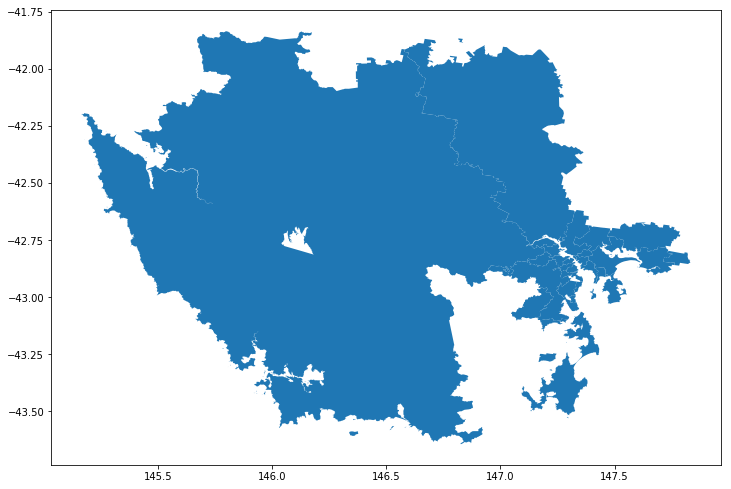

In [551]:
gpd.GeoSeries(d_hob.geometry).plot();

In [552]:
ds_hob.data[['Postcode', 'An_1']].groupby('Postcode').mean().head()

,An_1
Postcode,
7000,4.076923
7004,4.333333
7005,3.666667
7008,3.588235
7009,3.000000


In [553]:
ds_hob.freq_table('An_1')

,1. Effects from global climate change and Antarctic ice-melt.,Frequency
index,,
1.0,Not at all concerned,6
2.0,A Little concerned,27
3.0,Concerned,28
4.0,Very Concerned,86
5.0,Passionately concerned,51


In [554]:
an_1_avg = ds_hob.data.groupby('Postcode').apply(lambda x: np.average(x['An_1'], weights = x.Weight) )
an_1_avg.index = an_1_avg.index.astype(int)

In [555]:
d_hob = d_hob.merge(pd.DataFrame(an_1_avg), how = 'left', left_index = True, right_index = True)
d_hob.rename(columns={0: 'an_1_avg'}, inplace=True)
d_hob.sort_values(['an_1_avg'], ascending = False).head()


,POA_CODE16,POA_NAME16,AREASQKM16,geometry,an_1_avg
POA_CODE16,,,,,
7020,7020,7020,56.4144,POLYGON ((147.4561187830001 -42.97241794499996...,5.000000
7019,7019,7019,15.4231,"POLYGON ((147.428446491 -42.88928523499993, 14...",5.000000
7052,7052,7052,6.2052,POLYGON ((147.3098399600001 -42.99770317199994...,4.608212
7004,7004,7004,9.9204,POLYGON ((147.3346278030001 -42.88671600999993...,4.486435
7030,7030,7030,3314.4543,(POLYGON ((147.1885624680001 -42.7354225669999...,4.433130


In [556]:
ds.freq_table('An_1')

,1. Effects from global climate change and Antarctic ice-melt.,Frequency
index,,
1.0,Not at all concerned,14
2.0,A Little concerned,60
3.0,Concerned,143
4.0,Very Concerned,175
5.0,Passionately concerned,106


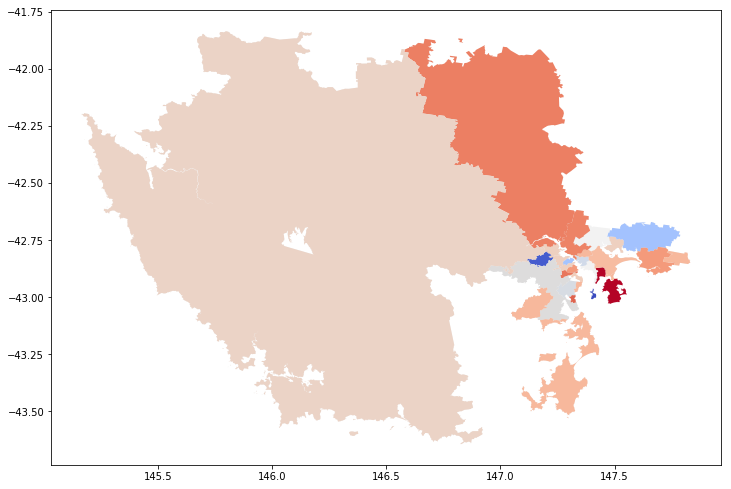

In [557]:
ax = d_hob.plot(color="grey", alpha = 0.1)

d_hob['an_1_avg'].fillna(0.)
d_hob_with_vals = d_hob[pd.notnull(d_hob['an_1_avg'])]
#d_hob_with_vals = d_hob_with_vals[d_hob_with_vals['an_1_avg']>=4.]
d_hob_with_vals.plot(ax = ax, column='an_1_avg', cmap = 'coolwarm')

#d_hob['an_1_avg'].head()

In [558]:
d_tas['an_1_avg'].head()

POA_CODE16
7000    4.242817
7001         NaN
7004    4.486435
7005    3.759173
7007         NaN
Name: an_1_avg, dtype: float64

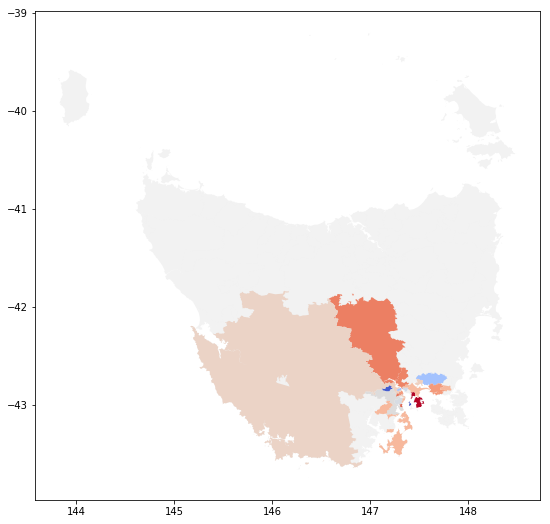

In [559]:
d_tas = d[(d.index >= 7000) & (d.index < 8000)]
d_tas = d_tas.merge(pd.DataFrame(an_1_avg), how = 'left', left_index = True, right_index = True)
d_tas.rename(columns={0: 'an_1_avg'}, inplace=True)
d_tas_with_vals = d_tas[pd.notnull(d_tas['an_1_avg'])]

ax_tas = d_tas.plot(color="grey", alpha = 0.1)
d_tas_with_vals.plot(ax = ax_tas, column='an_1_avg', cmap = 'coolwarm');

## Graphs

Renders all of the graphs using the histogram function.

In [560]:
cols_not_to_render = ['Folio', 'Location', 'Soc_2a', 'Soc_8', 'Soc_9a', 'Postcode', 'Weight', 'An_22','An_23a', 'An_23b', 'An_23c', ]
cols_to_render = ['An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 'An_14',
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21', 
       'Satis_1', 'Satis_2', 'Satis_3',
       'Satis_4', 'Satis_5', 'Satis_6', 'Satis_7', 'Satis_8', 'Satis_9',
       'Satis_10', 'Satis_11', 'Satis_12', 'Satis_13', 'Satis_14', 'Satis_15',
       'Satis_16', 'Satis_17', 'Satis_18', 'Satis_19', 'Satis_20', 'Satis_21',
       'Satis_22', 'Satis_23', 'Satis_24', 'Satis_25', 'Satis_26', 'Satis_27',
       'Satis_28', 'Satis_29', 'Satis_30', 'Satis_31', 'Satis_32', 'Satis_33',
       'Satis_34', 'Satis_35', 'Satis_36', 'Satis_37', 'Satis_38', 'Satis_39',
       'Satis_40', 'Soc_1', 'Soc_3', 'Soc_2b', 'Soc_4', 'Soc_5',
       'Soc_6', 'Soc_7', 'Soc_9b','Soc_10']



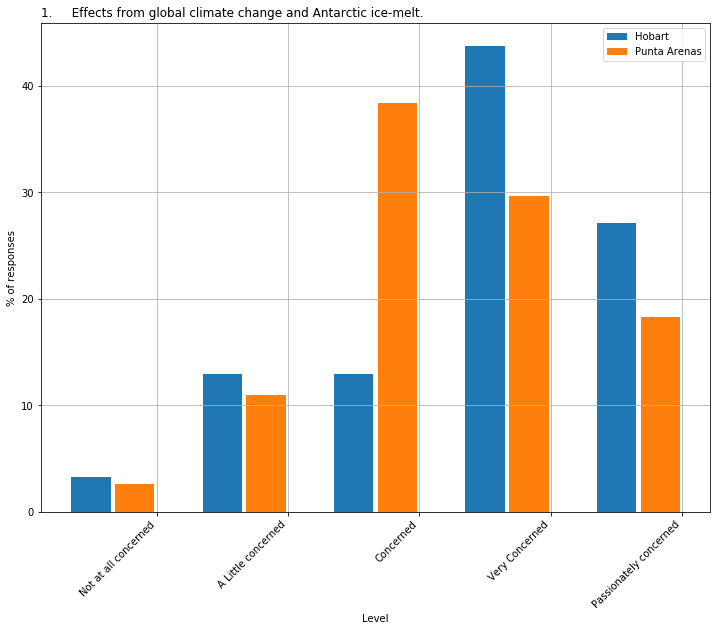

,Hobart,Punta Arenas
Not at all concerned,3.3,2.7
A Little concerned,13,11
Concerned,12.9,38.3
Very Concerned,43.7,29.7
Passionately concerned,27.1,18.3


In [761]:
ds.gen_histogram(['An_1', 'Weight'], stacked = False, legend_labels = ['Hobart', 'Punta Arenas'], normalise=True, use_weights = True)

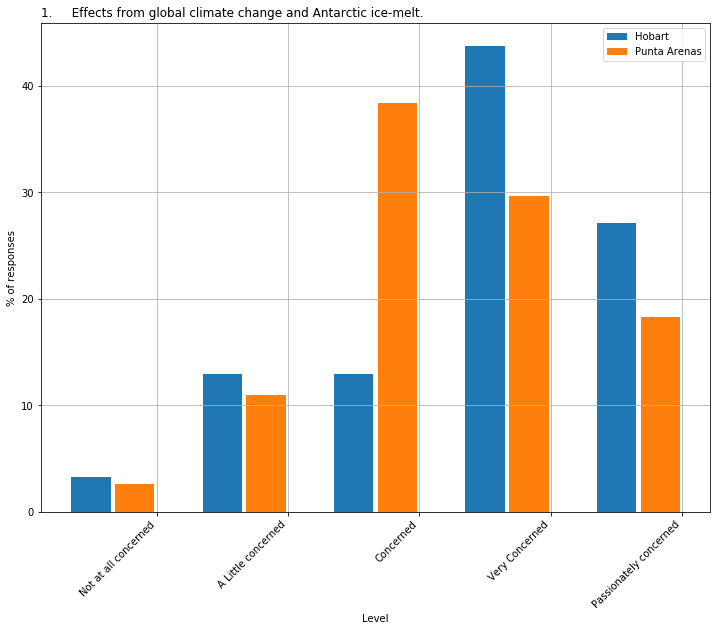

,Hobart,Punta Arenas
Not at all concerned,3.3,2.7
A Little concerned,13,11
Concerned,12.9,38.3
Very Concerned,43.7,29.7
Passionately concerned,27.1,18.3


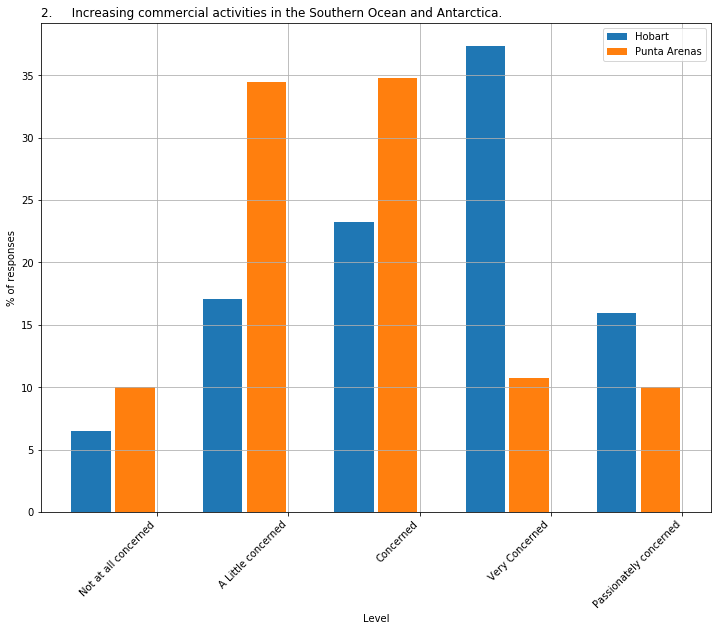

,Hobart,Punta Arenas
Not at all concerned,6.5,10
A Little concerned,17.1,34.4
Concerned,23.2,34.8
Very Concerned,37.3,10.7
Passionately concerned,15.9,10


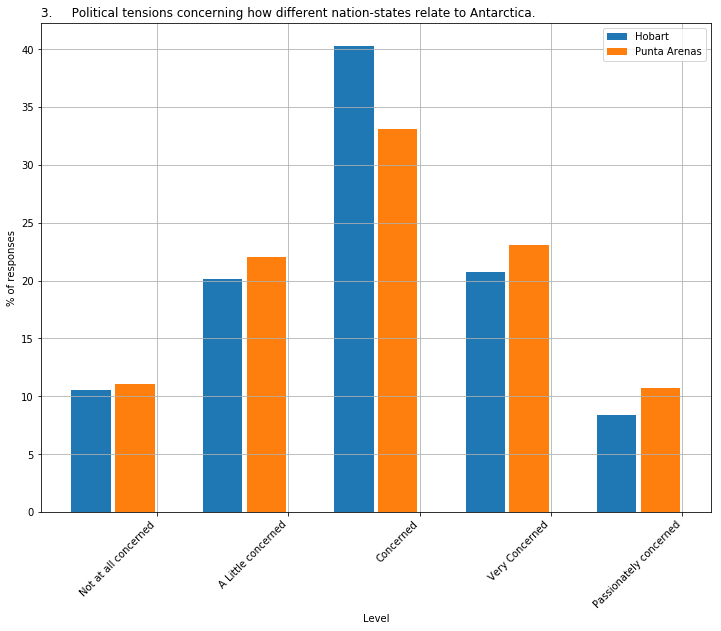

,Hobart,Punta Arenas
Not at all concerned,10.5,11
A Little concerned,20.1,22.1
Concerned,40.3,33.1
Very Concerned,20.7,23.1
Passionately concerned,8.4,10.7


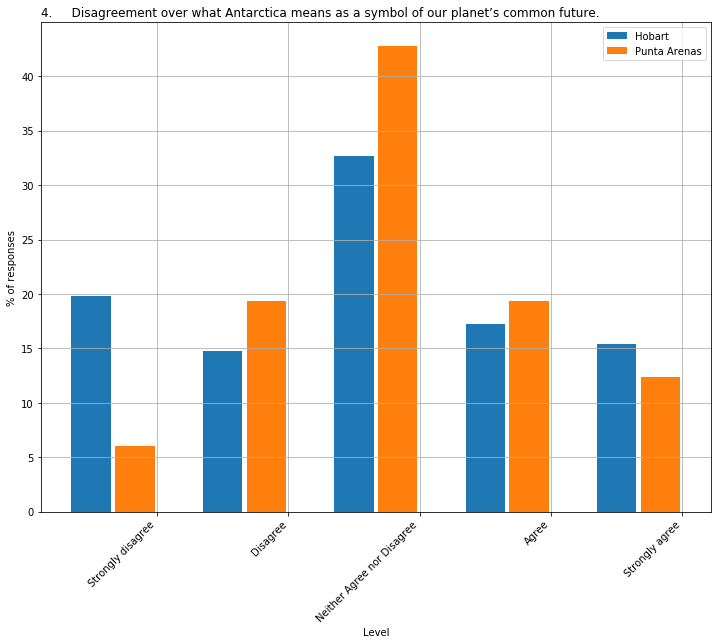

,Hobart,Punta Arenas
Strongly disagree,19.9,6
Disagree,14.7,19.4
Neither Agree nor Disagree,32.7,42.8
Agree,17.3,19.4
Strongly agree,15.4,12.4


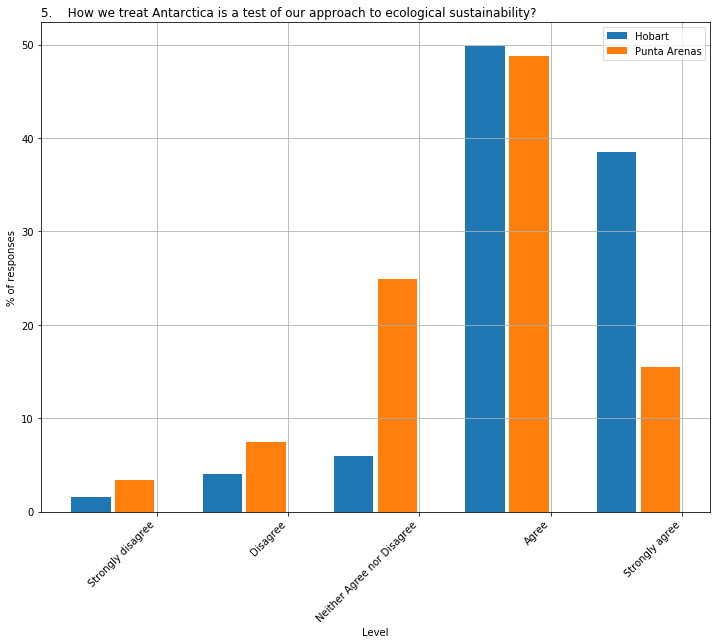

,Hobart,Punta Arenas
Strongly disagree,1.6,3.4
Disagree,4.1,7.4
Neither Agree nor Disagree,6,24.9
Agree,49.9,48.8
Strongly agree,38.5,15.5


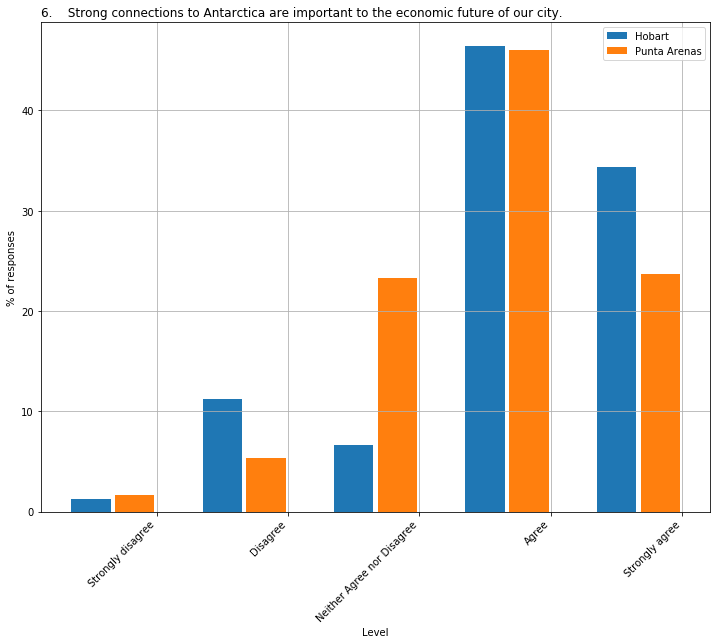

,Hobart,Punta Arenas
Strongly disagree,1.2,1.7
Disagree,11.3,5.3
Neither Agree nor Disagree,6.6,23.3
Agree,46.5,46
Strongly agree,34.4,23.7


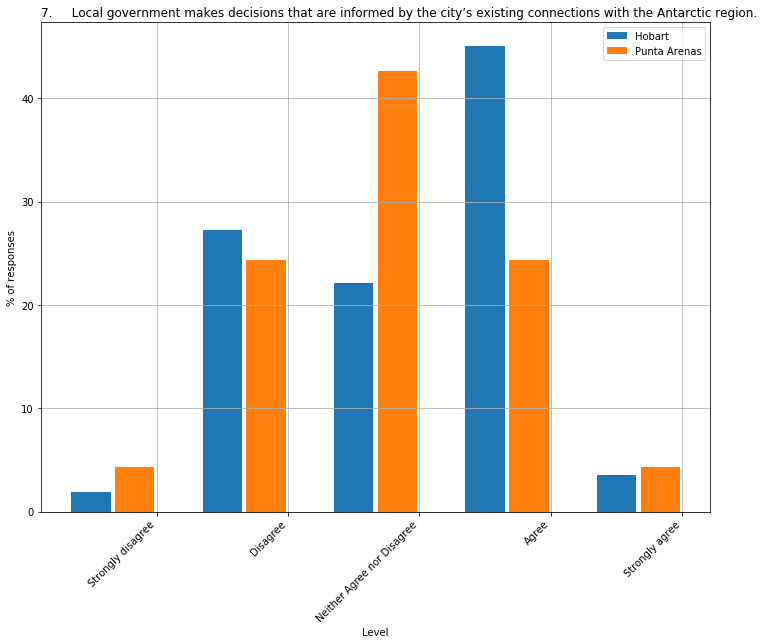

,Hobart,Punta Arenas
Strongly disagree,1.9,4.3
Disagree,27.3,24.3
Neither Agree nor Disagree,22.1,42.7
Agree,45.1,24.3
Strongly agree,3.6,4.3


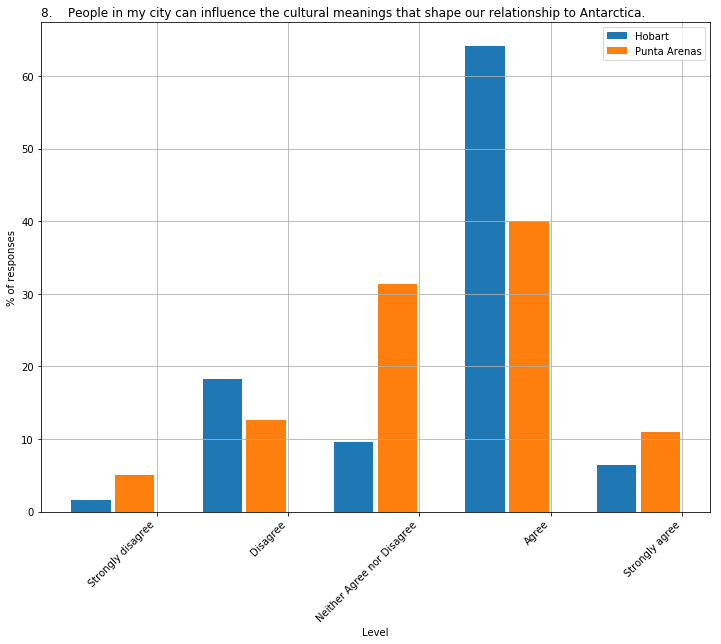

,Hobart,Punta Arenas
Strongly disagree,1.6,5
Disagree,18.2,12.7
Neither Agree nor Disagree,9.5,31.3
Agree,64.2,40
Strongly agree,6.5,11


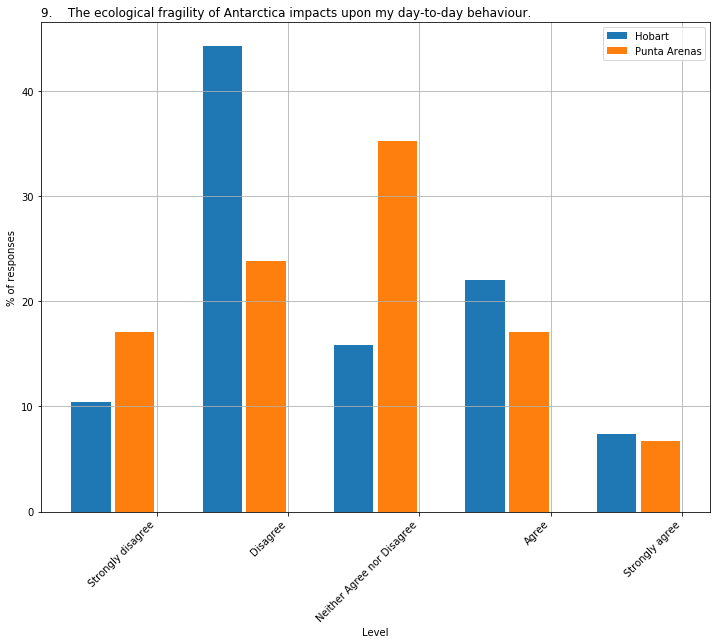

,Hobart,Punta Arenas
Strongly disagree,10.4,17.1
Disagree,44.3,23.8
Neither Agree nor Disagree,15.8,35.2
Agree,22,17.1
Strongly agree,7.4,6.7


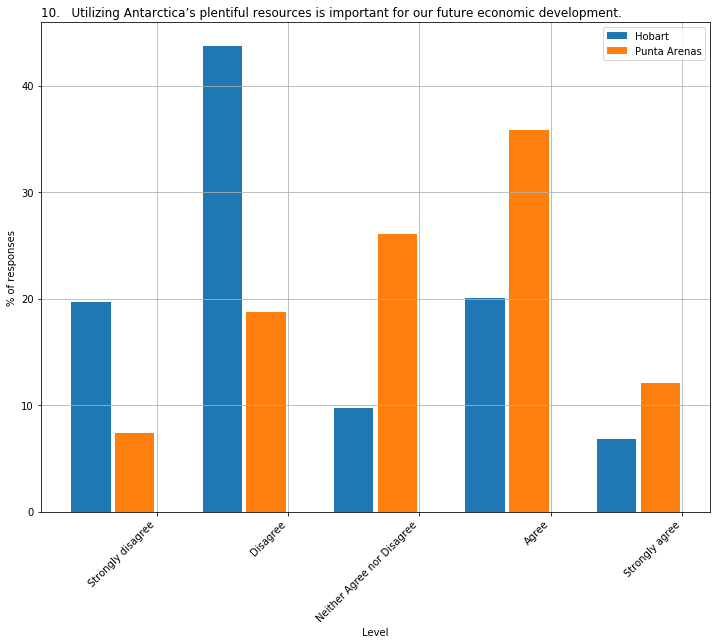

,Hobart,Punta Arenas
Strongly disagree,19.6,7.4
Disagree,43.7,18.7
Neither Agree nor Disagree,9.8,26.1
Agree,20,35.8
Strongly agree,6.8,12


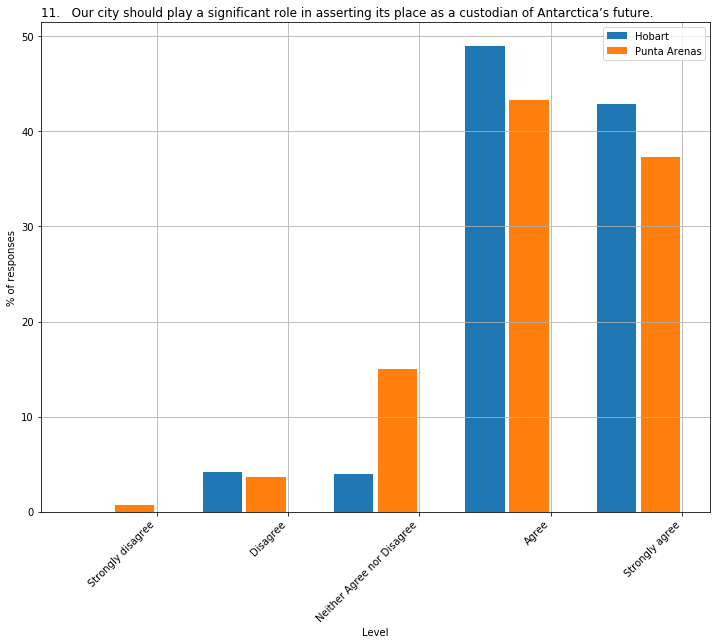

,Hobart,Punta Arenas
Strongly disagree,0,0.7
Disagree,4.2,3.7
Neither Agree nor Disagree,4,15
Agree,49,43.3
Strongly agree,42.9,37.3


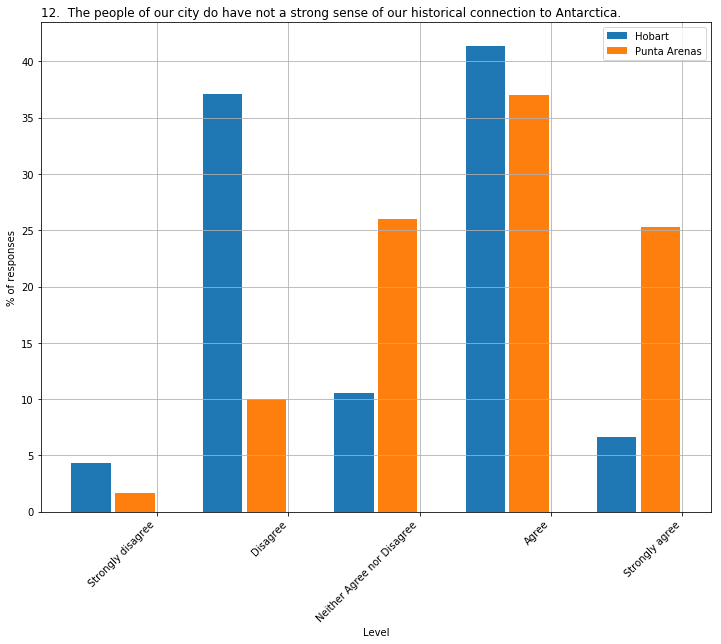

,Hobart,Punta Arenas
Strongly disagree,4.3,1.7
Disagree,37.1,10
Neither Agree nor Disagree,10.6,26
Agree,41.4,37
Strongly agree,6.6,25.3


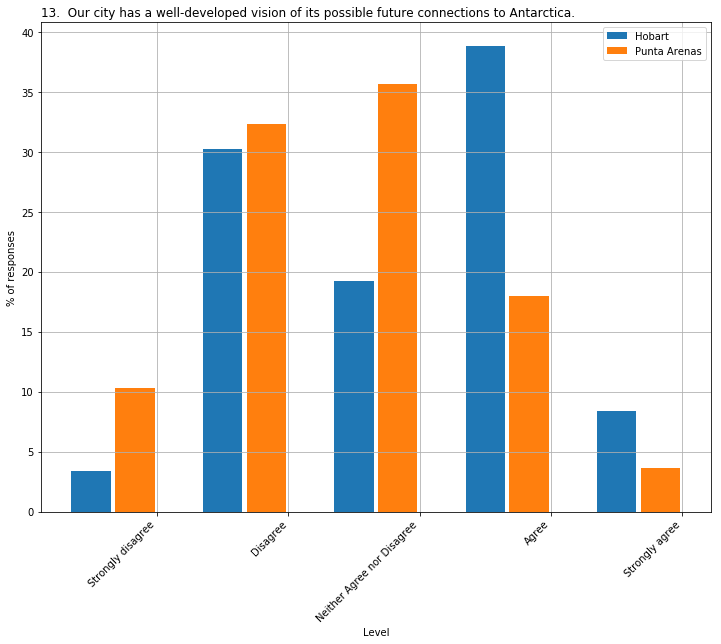

,Hobart,Punta Arenas
Strongly disagree,3.4,10.3
Disagree,30.2,32.3
Neither Agree nor Disagree,19.2,35.7
Agree,38.8,18
Strongly agree,8.4,3.7


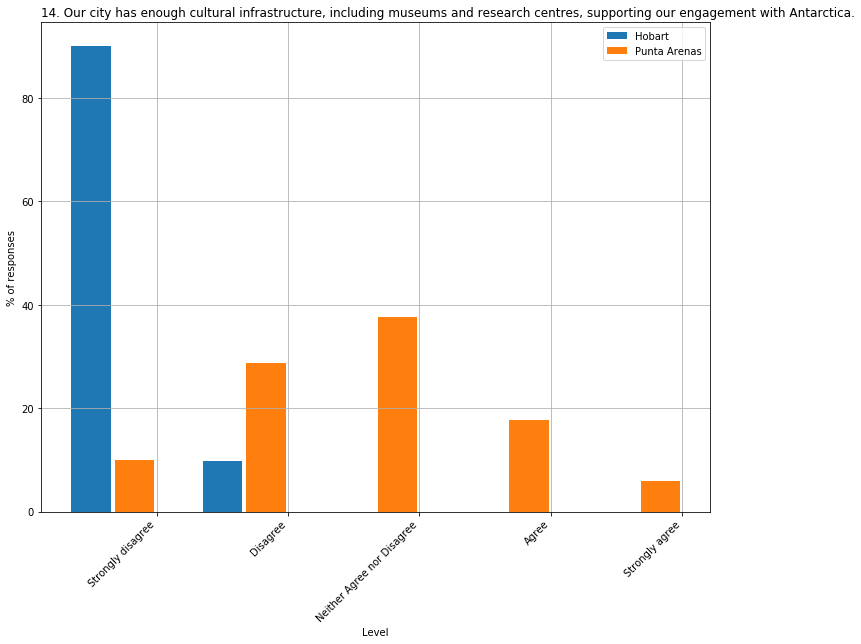

,Hobart,Punta Arenas
Strongly disagree,90.1,10
Disagree,9.9,28.7
Neither Agree nor Disagree,0,37.7
Agree,0,17.7
Strongly agree,0,6


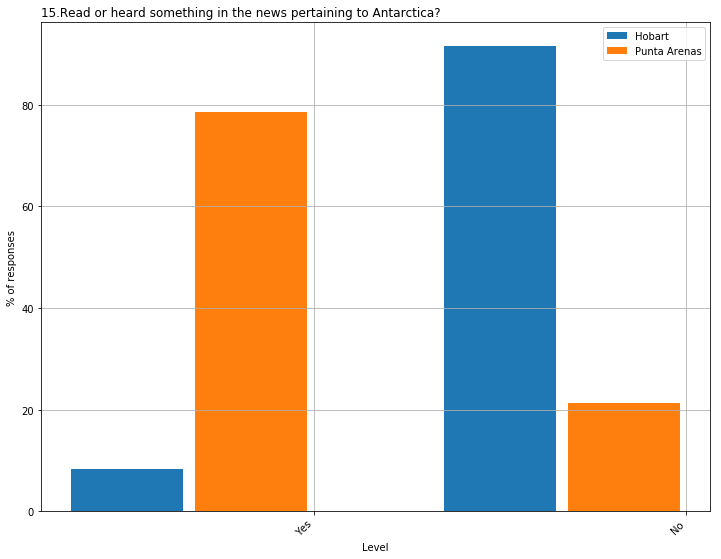

,Hobart,Punta Arenas
Yes,8.3,78.7
No,91.7,21.3


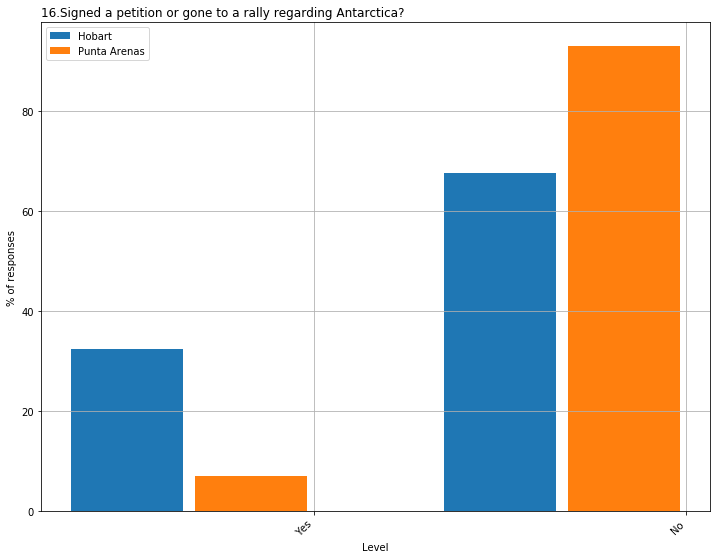

,Hobart,Punta Arenas
Yes,32.4,7
No,67.6,93


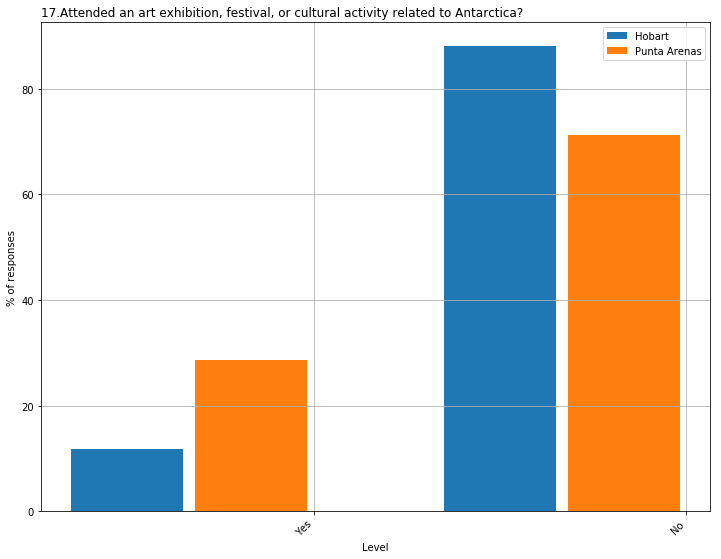

,Hobart,Punta Arenas
Yes,11.8,28.7
No,88.2,71.3


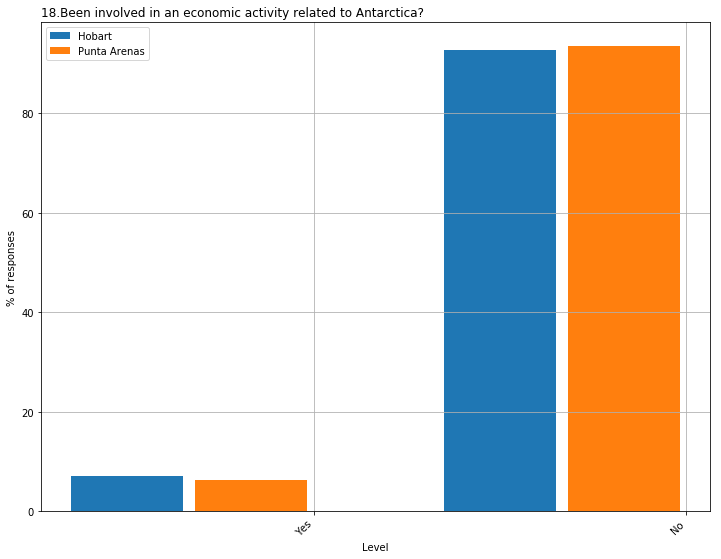

,Hobart,Punta Arenas
Yes,7.2,6.3
No,92.8,93.7


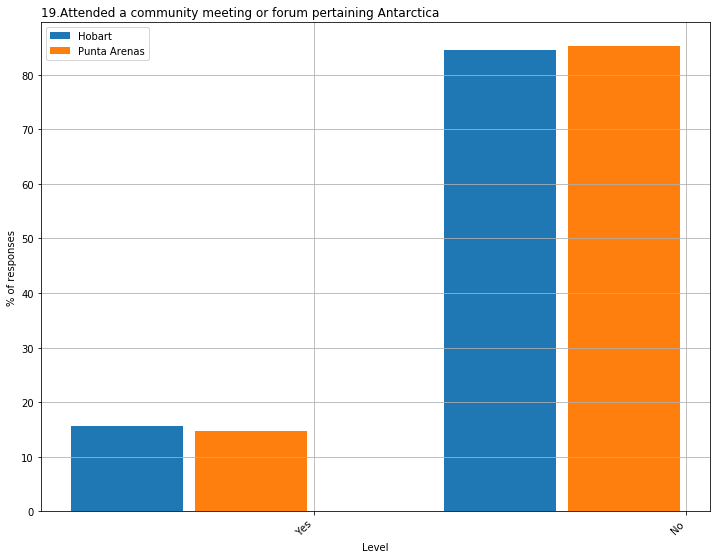

,Hobart,Punta Arenas
Yes,15.6,14.7
No,84.4,85.3


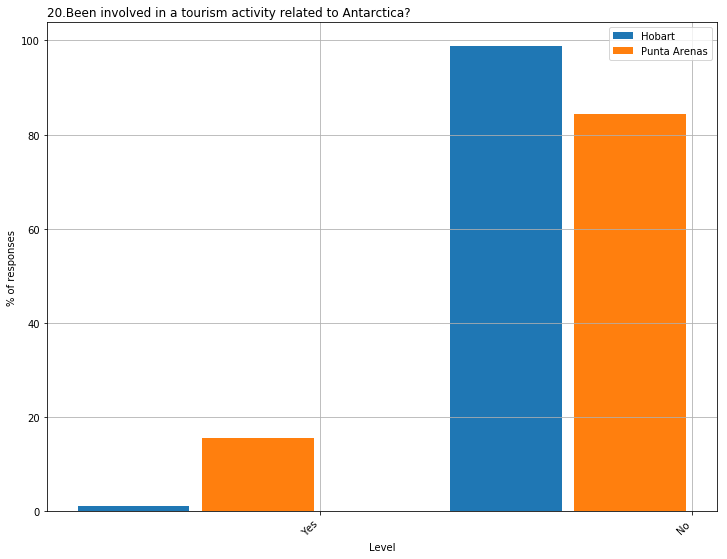

,Hobart,Punta Arenas
Yes,1.1,15.7
No,98.9,84.3


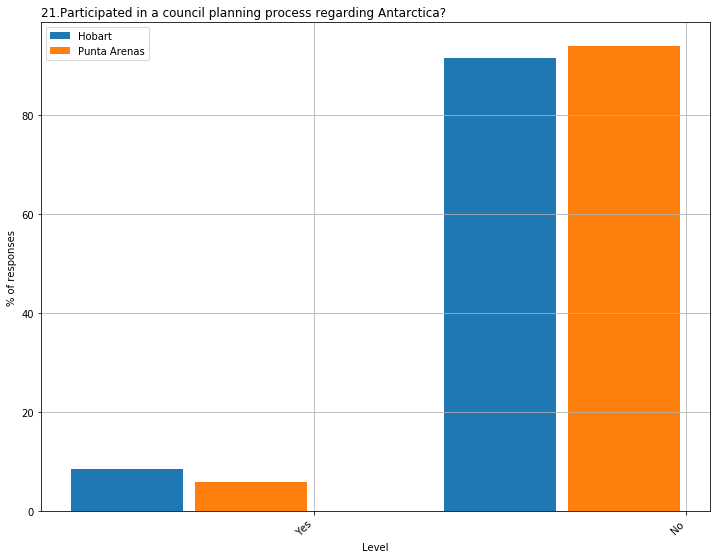

,Hobart,Punta Arenas
Yes,8.5,6
No,91.5,94


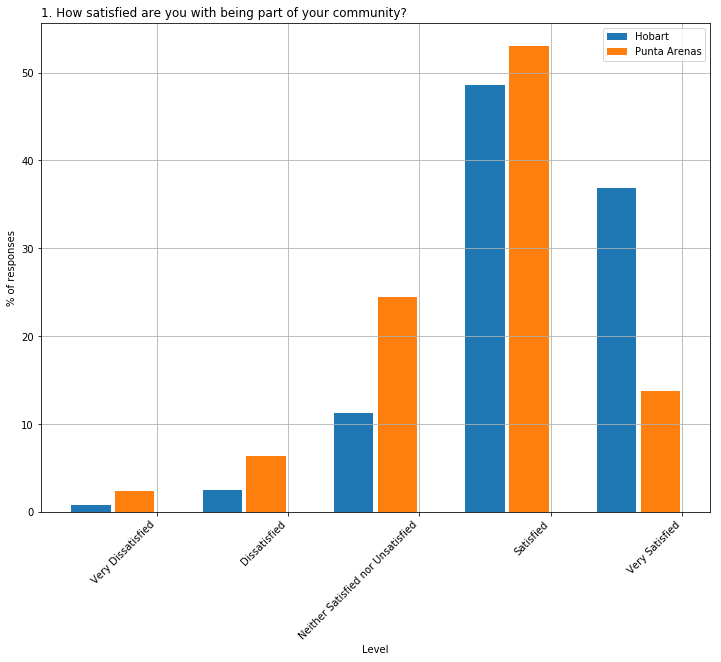

,Hobart,Punta Arenas
Very Dissatisfied,0.7,2.3
Dissatisfied,2.5,6.4
Neither Satisfied nor Unsatisfied,11.3,24.5
Satisfied,48.6,53
Very Satisfied,36.8,13.8


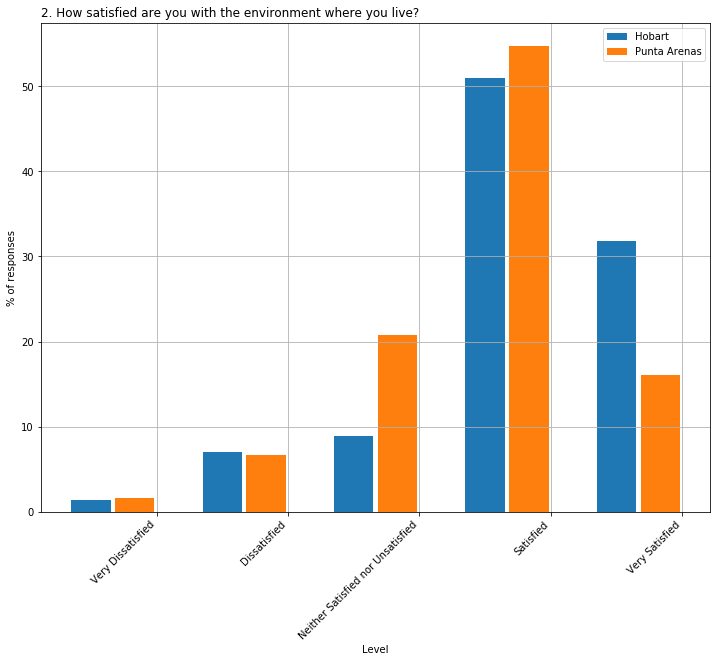

,Hobart,Punta Arenas
Very Dissatisfied,1.4,1.7
Dissatisfied,7,6.7
Neither Satisfied nor Unsatisfied,8.9,20.8
Satisfied,51,54.7
Very Satisfied,31.7,16.1


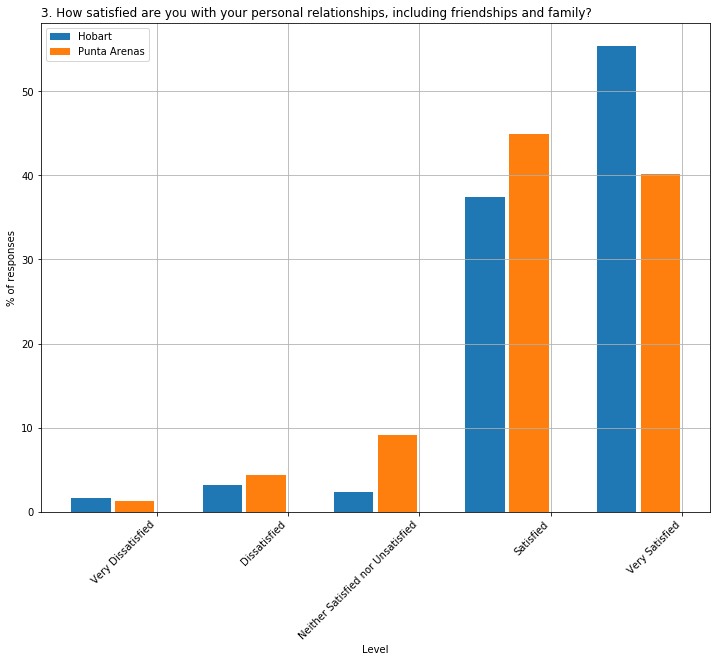

,Hobart,Punta Arenas
Very Dissatisfied,1.6,1.4
Dissatisfied,3.2,4.4
Neither Satisfied nor Unsatisfied,2.4,9.1
Satisfied,37.4,44.9
Very Satisfied,55.4,40.2


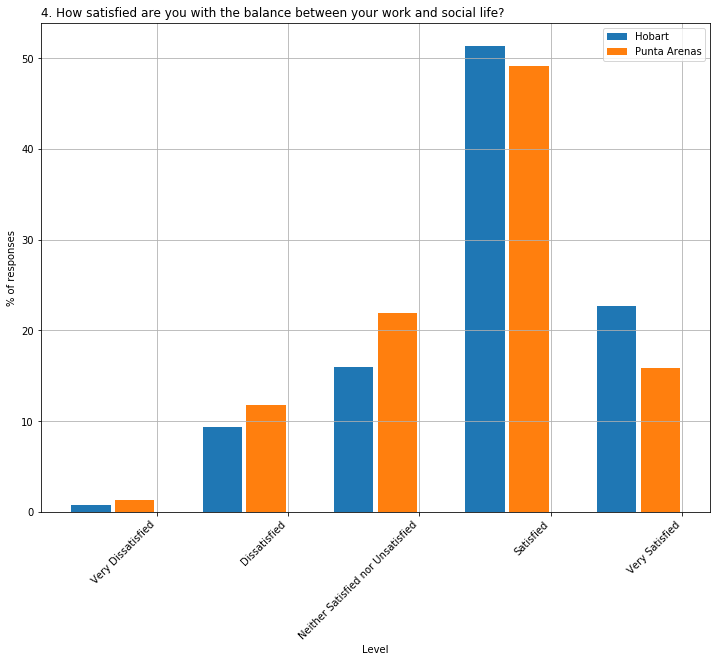

,Hobart,Punta Arenas
Very Dissatisfied,0.7,1.3
Dissatisfied,9.3,11.8
Neither Satisfied nor Unsatisfied,16,21.9
Satisfied,51.3,49.2
Very Satisfied,22.7,15.8


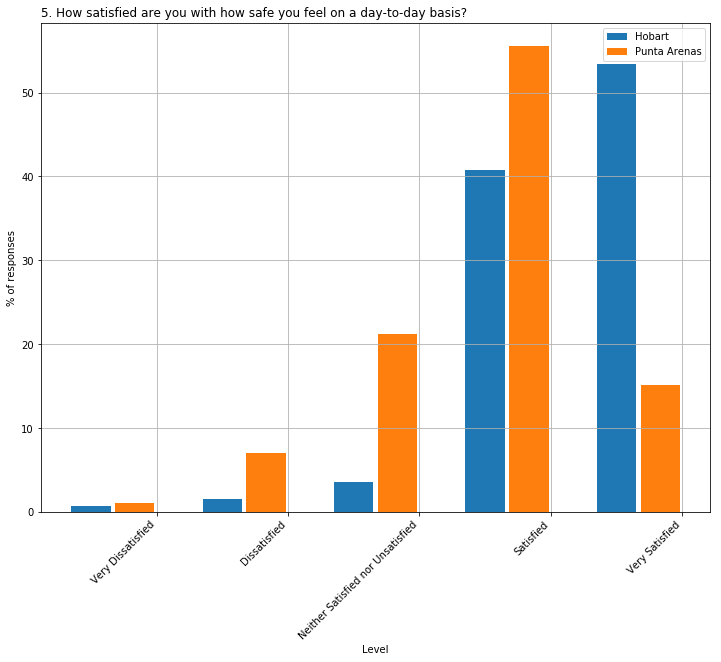

,Hobart,Punta Arenas
Very Dissatisfied,0.6,1
Dissatisfied,1.6,7.1
Neither Satisfied nor Unsatisfied,3.6,21.2
Satisfied,40.8,55.6
Very Satisfied,53.4,15.2


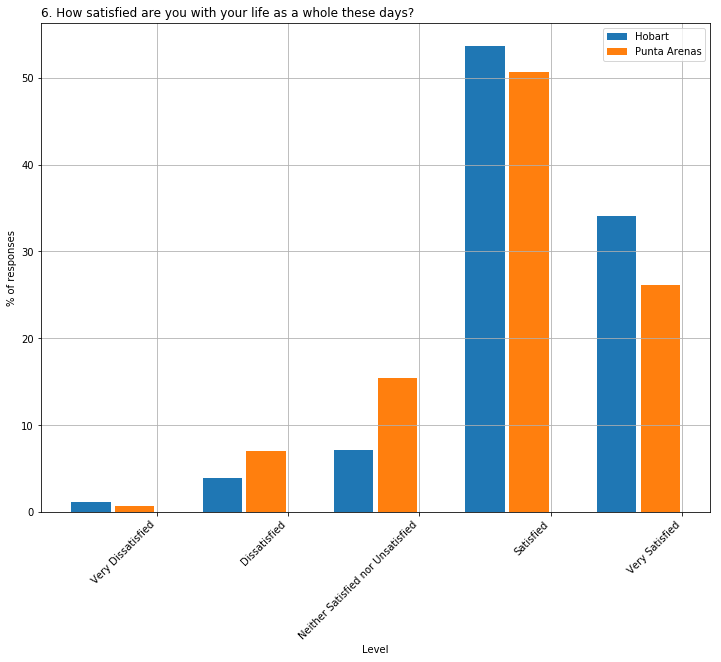

,Hobart,Punta Arenas
Very Dissatisfied,1.1,0.7
Dissatisfied,3.9,7
Neither Satisfied nor Unsatisfied,7.2,15.4
Satisfied,53.7,50.7
Very Satisfied,34.1,26.2


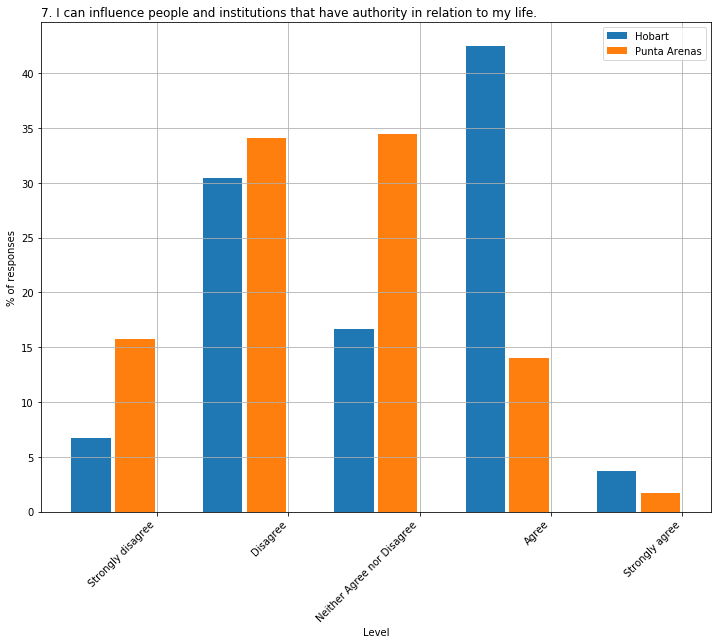

,Hobart,Punta Arenas
Strongly disagree,6.7,15.7
Disagree,30.5,34.1
Neither Agree nor Disagree,16.6,34.4
Agree,42.5,14
Strongly agree,3.7,1.7


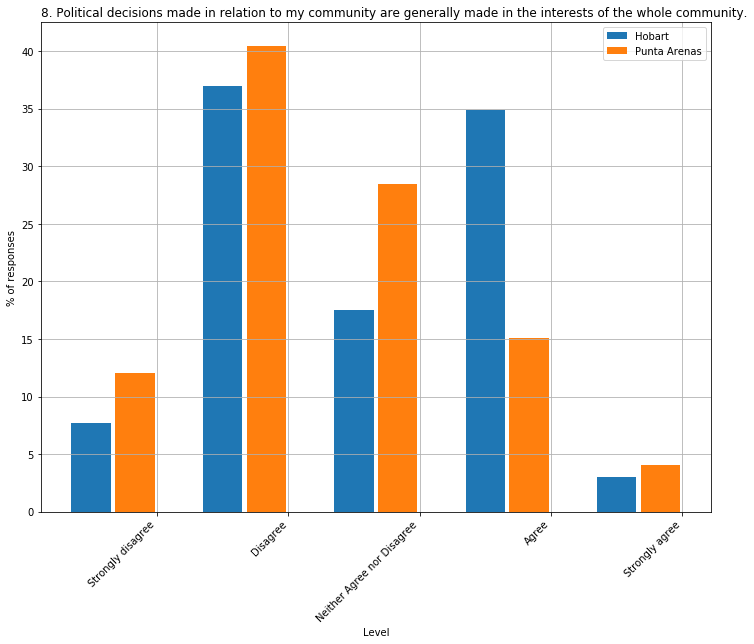

,Hobart,Punta Arenas
Strongly disagree,7.7,12
Disagree,37,40.5
Neither Agree nor Disagree,17.5,28.4
Agree,34.8,15.1
Strongly agree,3,4


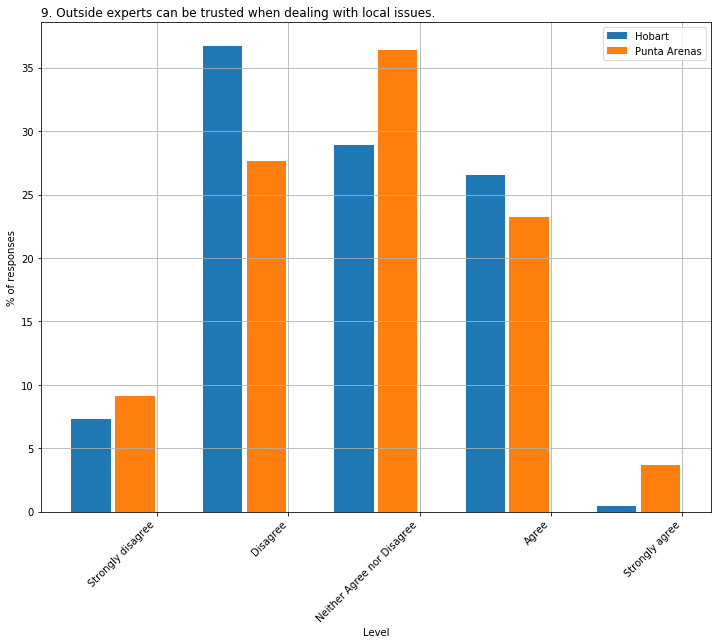

,Hobart,Punta Arenas
Strongly disagree,7.3,9.1
Disagree,36.7,27.6
Neither Agree nor Disagree,28.9,36.4
Agree,26.5,23.2
Strongly agree,0.5,3.7


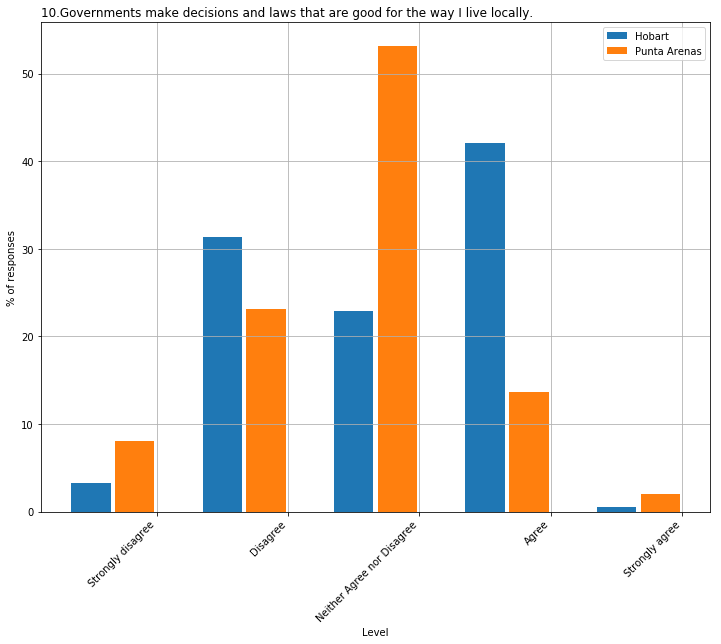

,Hobart,Punta Arenas
Strongly disagree,3.2,8
Disagree,31.3,23.1
Neither Agree nor Disagree,22.9,53.2
Agree,42,13.7
Strongly agree,0.5,2


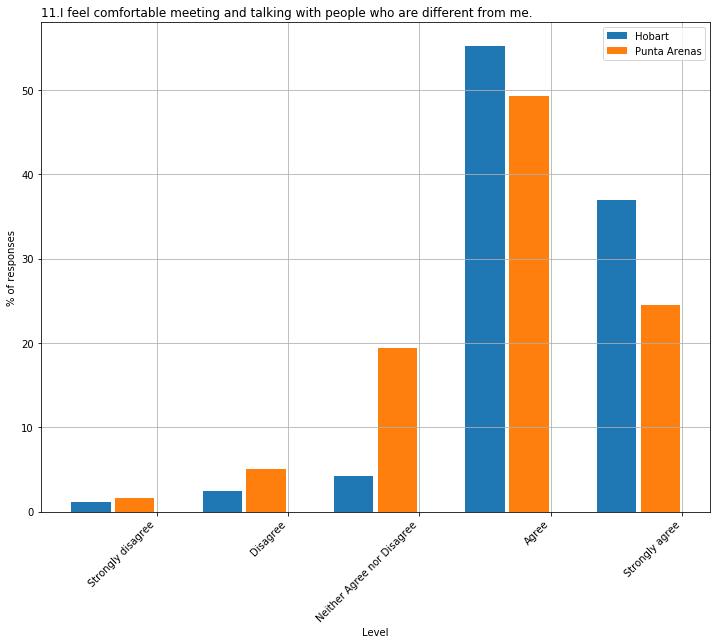

,Hobart,Punta Arenas
Strongly disagree,1.2,1.7
Disagree,2.4,5
Neither Agree nor Disagree,4.3,19.5
Agree,55.2,49.3
Strongly agree,36.9,24.5


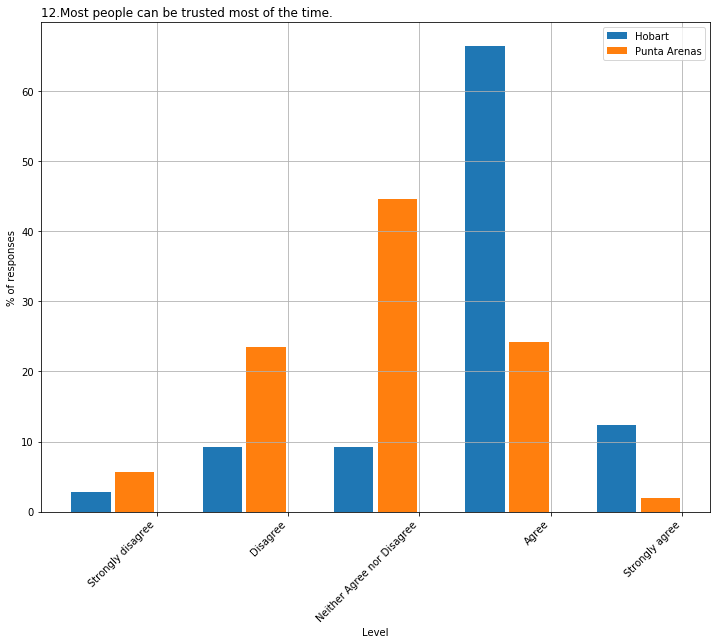

,Hobart,Punta Arenas
Strongly disagree,2.8,5.7
Disagree,9.3,23.5
Neither Agree nor Disagree,9.2,44.6
Agree,66.4,24.2
Strongly agree,12.3,2


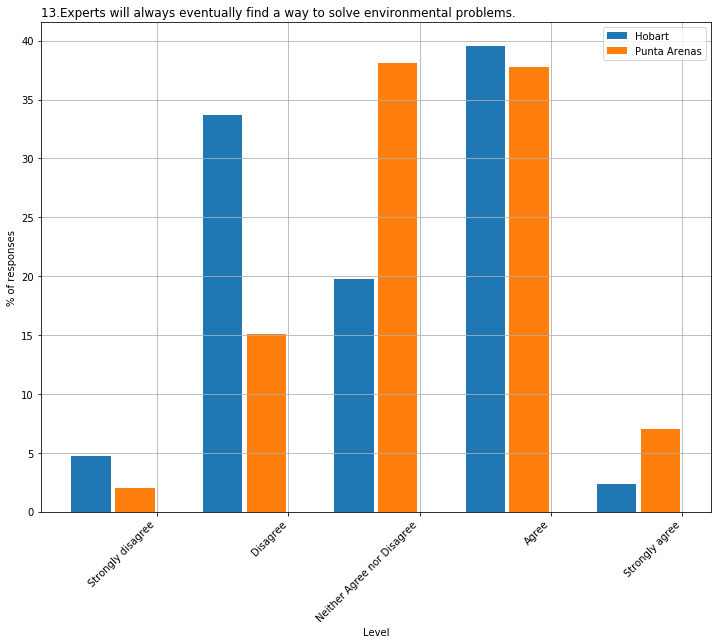

,Hobart,Punta Arenas
Strongly disagree,4.7,2
Disagree,33.7,15.1
Neither Agree nor Disagree,19.8,38.1
Agree,39.6,37.8
Strongly agree,2.3,7


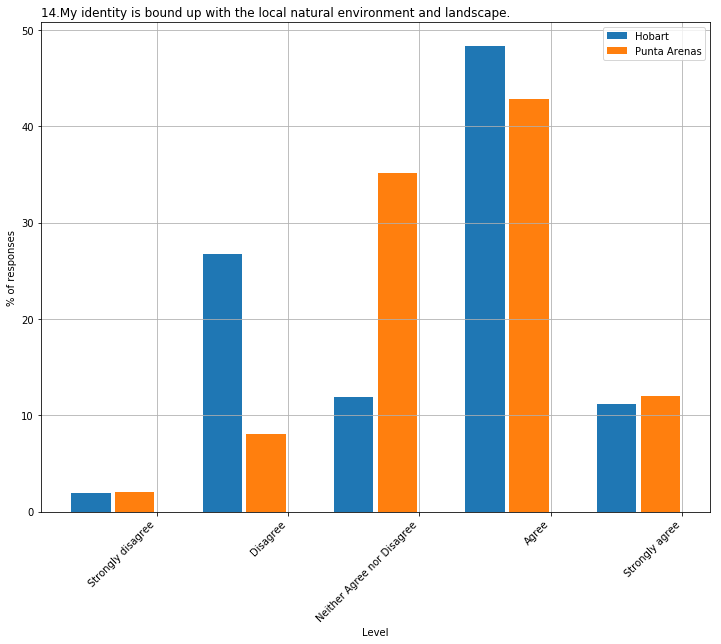

,Hobart,Punta Arenas
Strongly disagree,1.9,2
Disagree,26.7,8
Neither Agree nor Disagree,11.9,35.1
Agree,48.4,42.8
Strongly agree,11.1,12


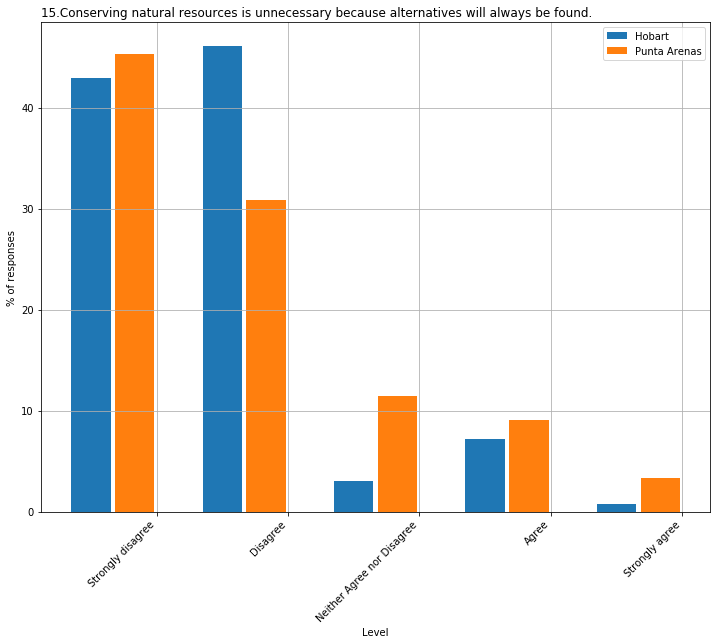

,Hobart,Punta Arenas
Strongly disagree,42.9,45.3
Disagree,46.1,30.9
Neither Agree nor Disagree,3,11.4
Agree,7.1,9.1
Strongly agree,0.7,3.4


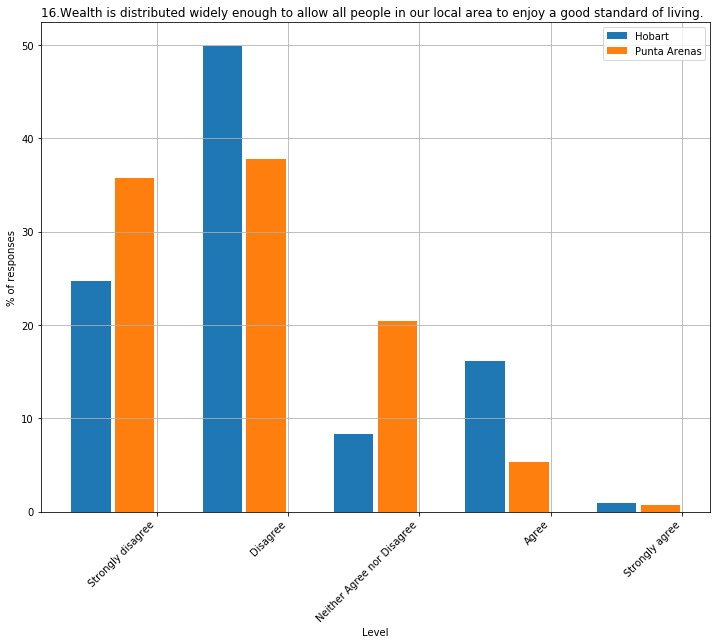

,Hobart,Punta Arenas
Strongly disagree,24.7,35.8
Disagree,49.9,37.8
Neither Agree nor Disagree,8.3,20.4
Agree,16.2,5.4
Strongly agree,0.9,0.7


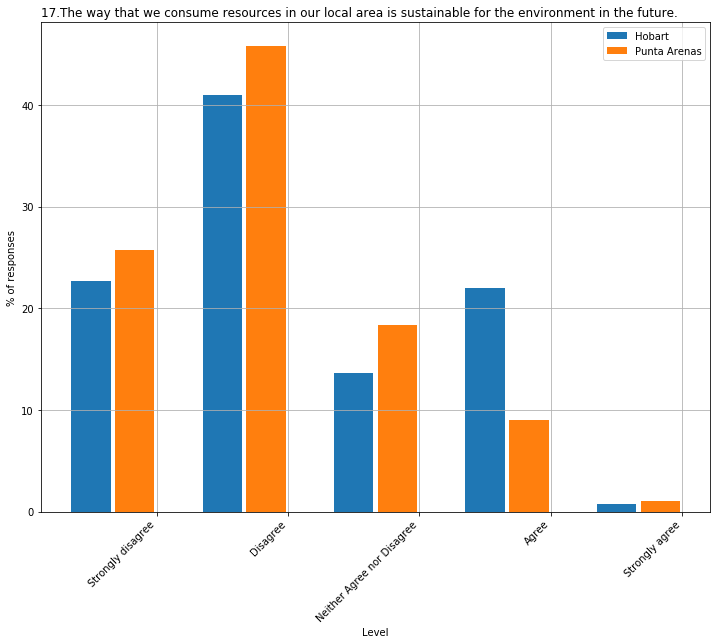

,Hobart,Punta Arenas
Strongly disagree,22.7,25.8
Disagree,41,45.8
Neither Agree nor Disagree,13.7,18.4
Agree,22,9
Strongly agree,0.7,1


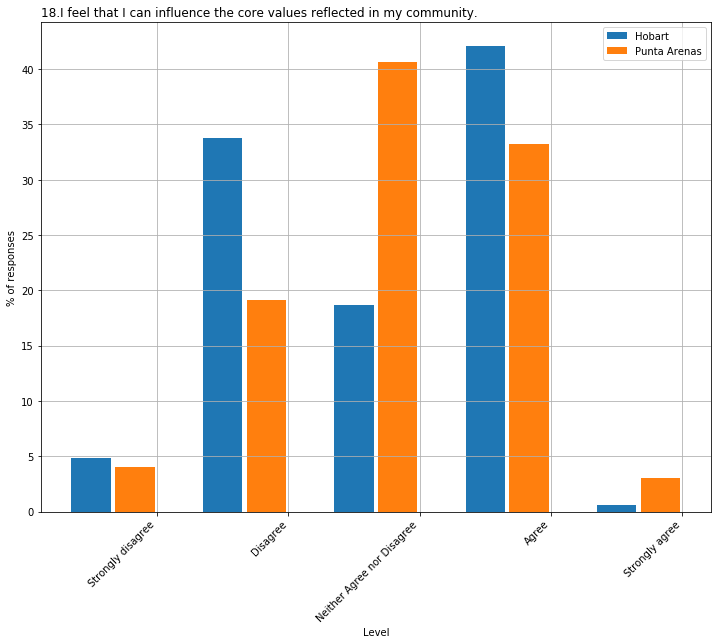

,Hobart,Punta Arenas
Strongly disagree,4.8,4
Disagree,33.8,19.1
Neither Agree nor Disagree,18.7,40.6
Agree,42.1,33.2
Strongly agree,0.6,3


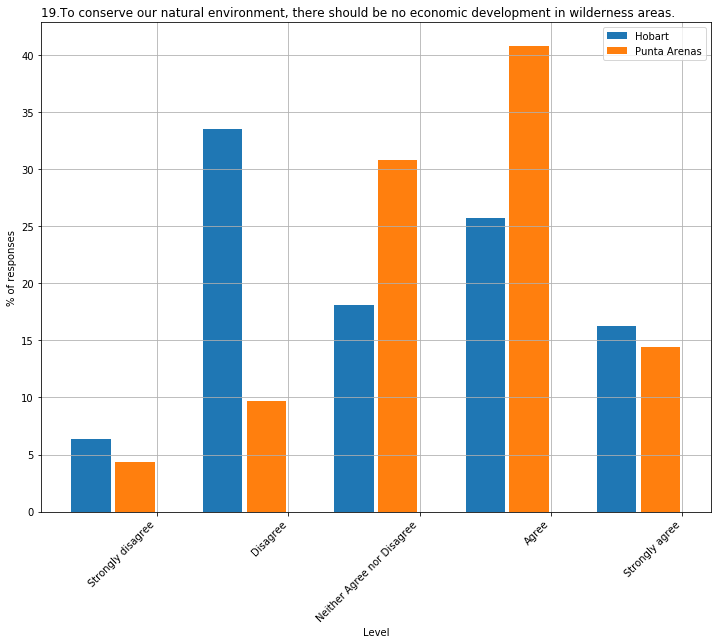

,Hobart,Punta Arenas
Strongly disagree,6.4,4.3
Disagree,33.5,9.7
Neither Agree nor Disagree,18.1,30.8
Agree,25.7,40.8
Strongly agree,16.2,14.4


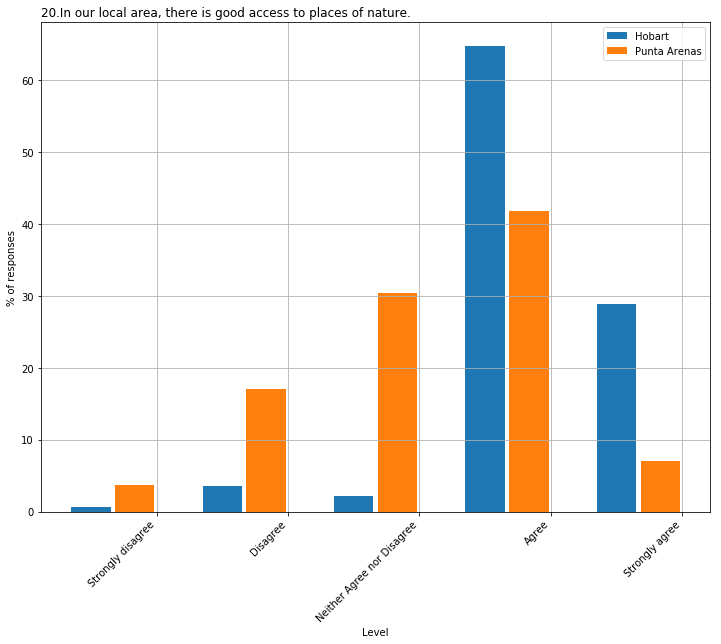

,Hobart,Punta Arenas
Strongly disagree,0.6,3.7
Disagree,3.6,17.1
Neither Agree nor Disagree,2.2,30.4
Agree,64.8,41.8
Strongly agree,28.9,7


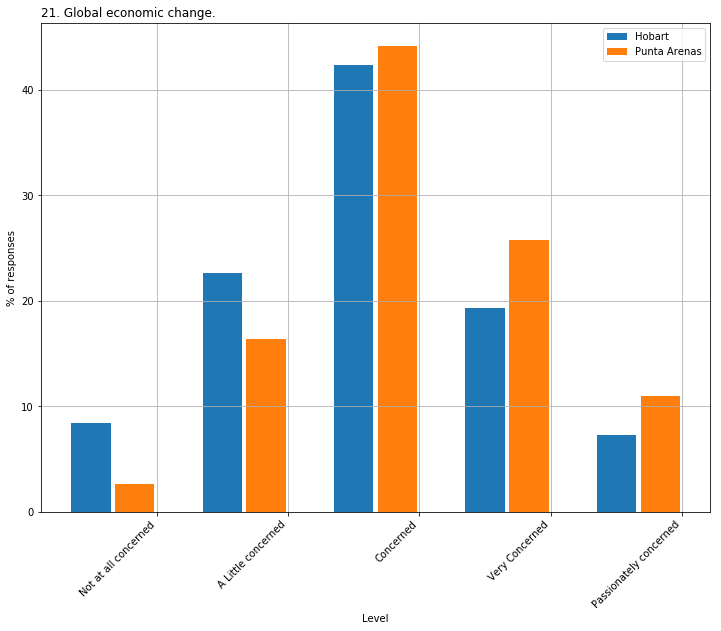

,Hobart,Punta Arenas
Not at all concerned,8.4,2.7
A Little concerned,22.7,16.4
Concerned,42.3,44.1
Very Concerned,19.3,25.8
Passionately concerned,7.3,11


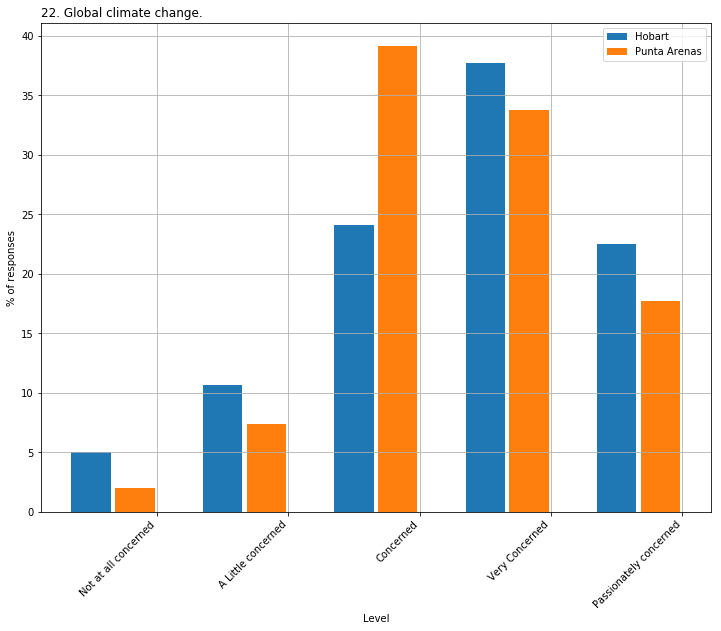

,Hobart,Punta Arenas
Not at all concerned,5,2
A Little concerned,10.7,7.4
Concerned,24.1,39.1
Very Concerned,37.7,33.8
Passionately concerned,22.5,17.7


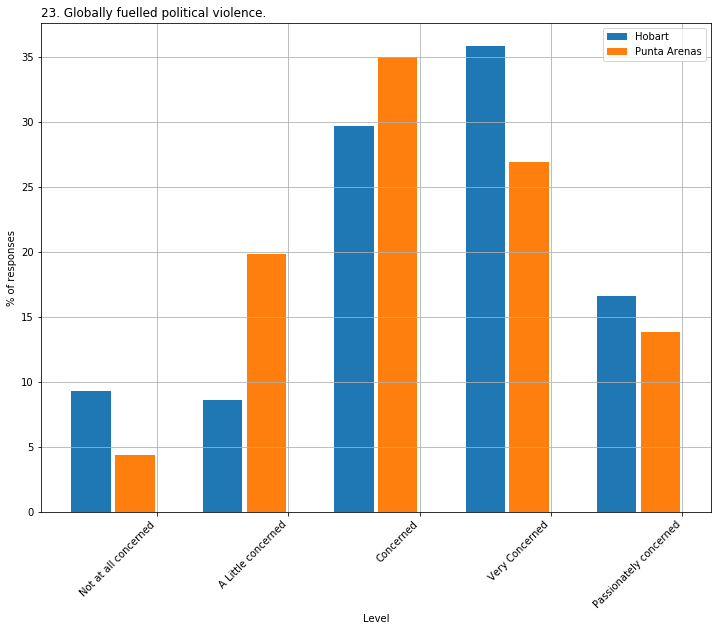

,Hobart,Punta Arenas
Not at all concerned,9.3,4.4
A Little concerned,8.6,19.9
Concerned,29.7,35
Very Concerned,35.8,26.9
Passionately concerned,16.6,13.8


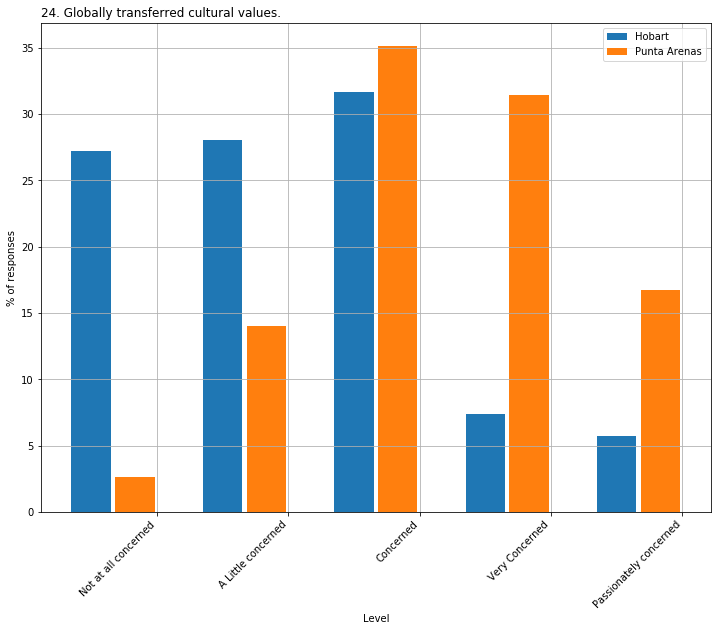

,Hobart,Punta Arenas
Not at all concerned,27.2,2.7
A Little concerned,28,14
Concerned,31.7,35.1
Very Concerned,7.4,31.4
Passionately concerned,5.7,16.7


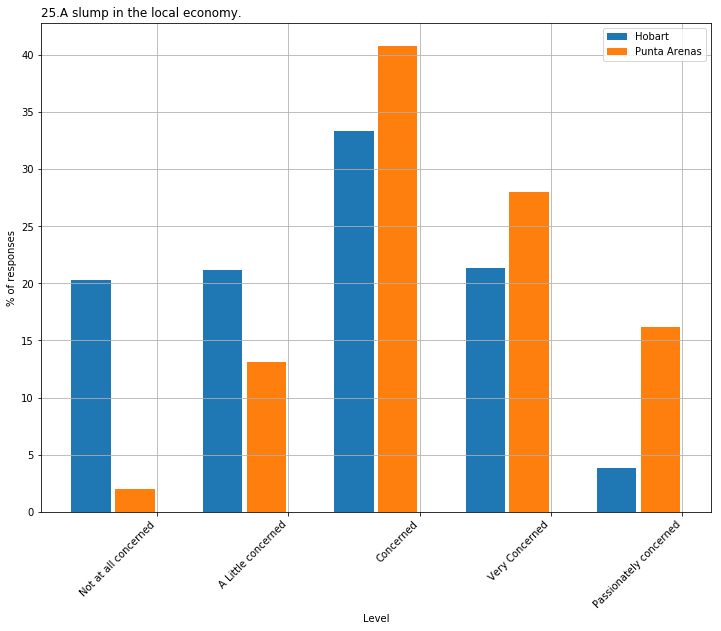

,Hobart,Punta Arenas
Not at all concerned,20.3,2
A Little concerned,21.2,13.1
Concerned,33.3,40.7
Very Concerned,21.3,27.9
Passionately concerned,3.9,16.2


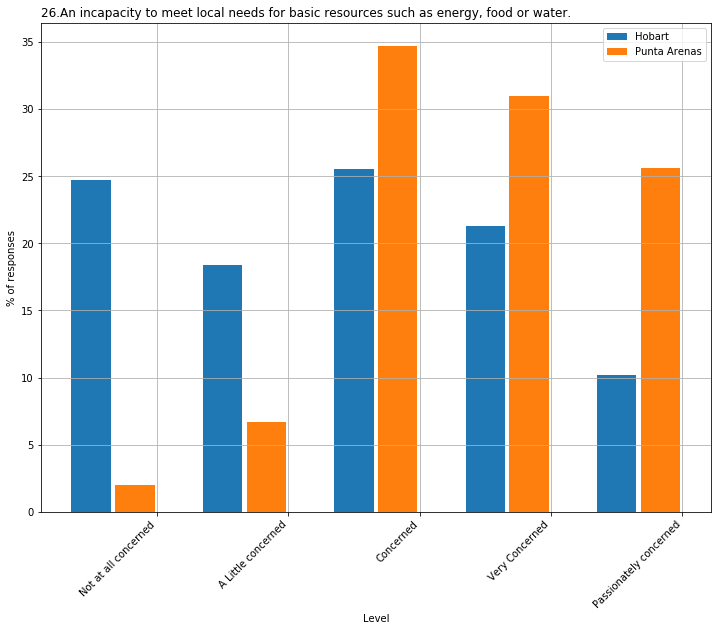

,Hobart,Punta Arenas
Not at all concerned,24.7,2
A Little concerned,18.4,6.7
Concerned,25.5,34.7
Very Concerned,21.3,31
Passionately concerned,10.2,25.6


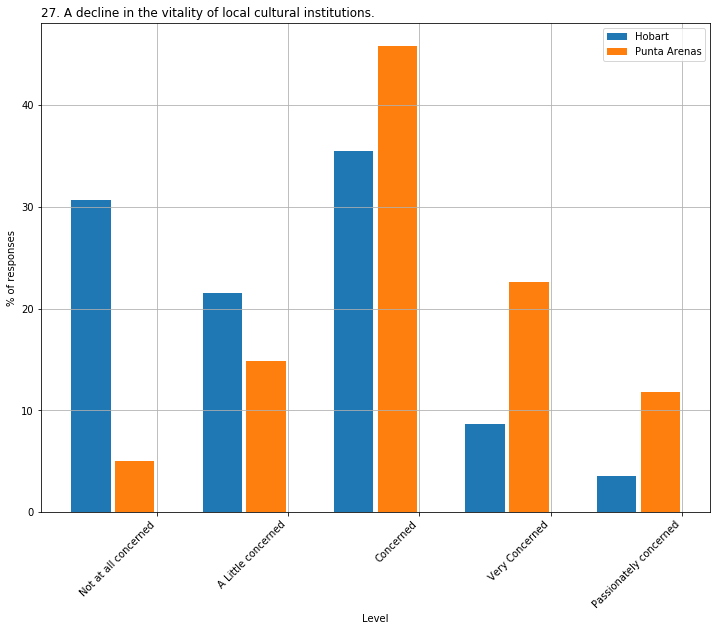

,Hobart,Punta Arenas
Not at all concerned,30.7,5.1
A Little concerned,21.5,14.8
Concerned,35.5,45.8
Very Concerned,8.7,22.6
Passionately concerned,3.6,11.8


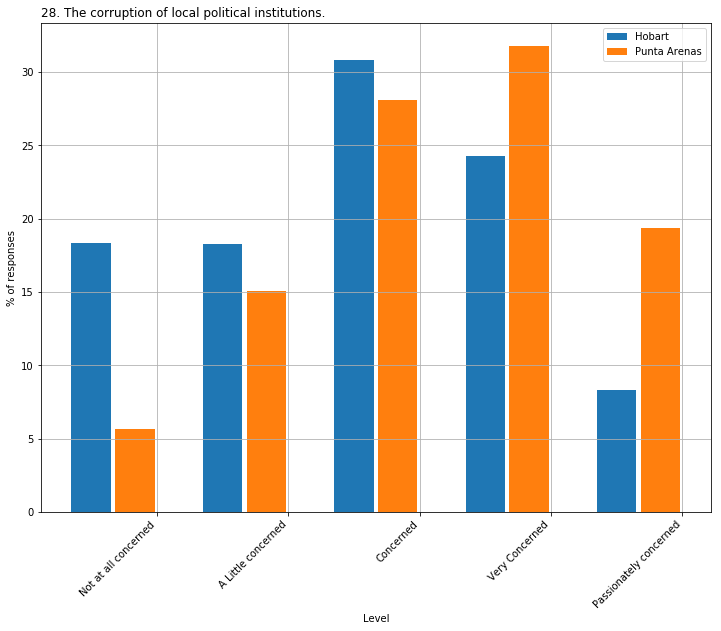

,Hobart,Punta Arenas
Not at all concerned,18.3,5.7
A Little concerned,18.3,15.1
Concerned,30.8,28.1
Very Concerned,24.3,31.8
Passionately concerned,8.3,19.4


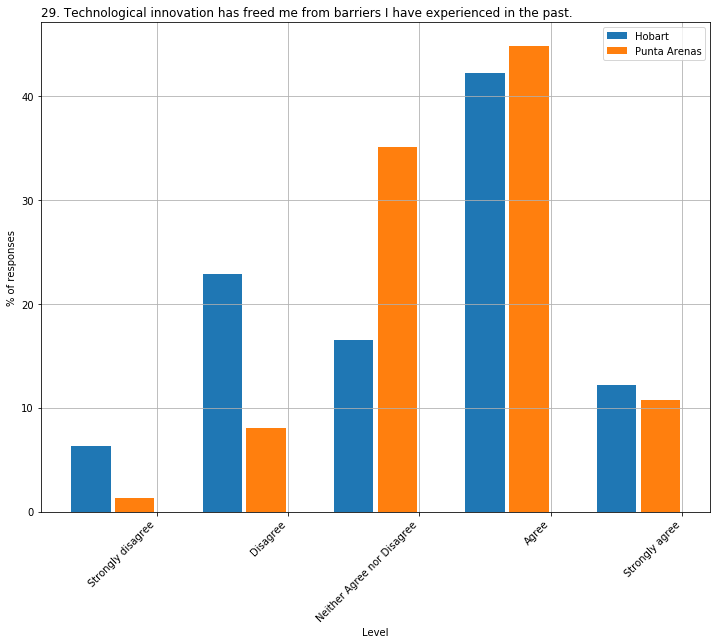

,Hobart,Punta Arenas
Strongly disagree,6.3,1.3
Disagree,22.8,8
Neither Agree nor Disagree,16.5,35.1
Agree,42.2,44.8
Strongly agree,12.1,10.7


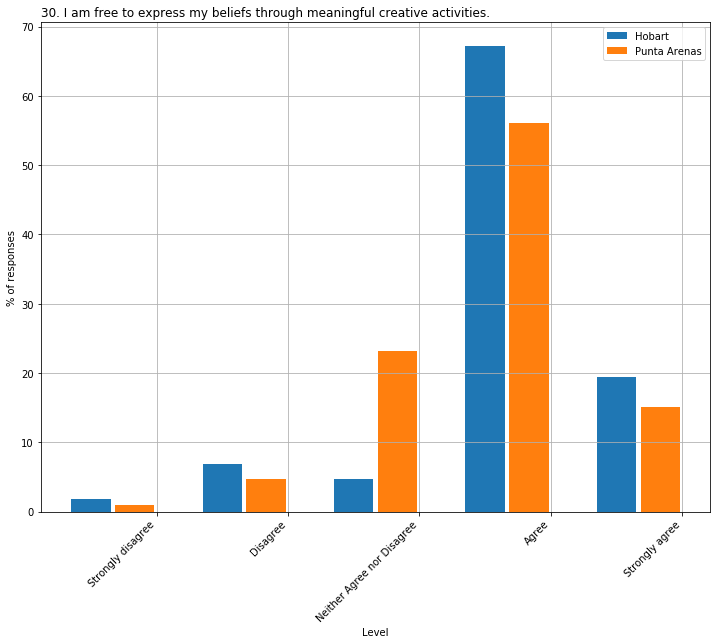

,Hobart,Punta Arenas
Strongly disagree,1.8,1
Disagree,6.9,4.7
Neither Agree nor Disagree,4.6,23.2
Agree,67.2,56
Strongly agree,19.4,15.1


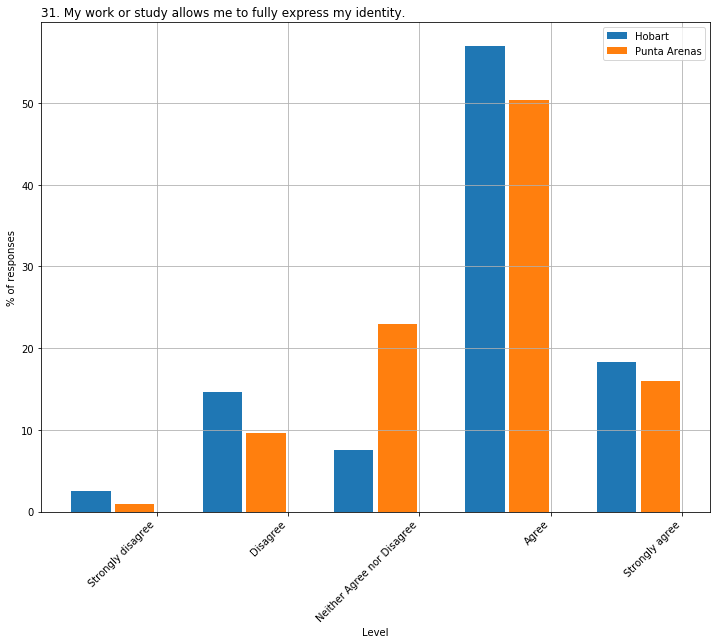

,Hobart,Punta Arenas
Strongly disagree,2.5,1
Disagree,14.7,9.7
Neither Agree nor Disagree,7.5,23
Agree,57,50.3
Strongly agree,18.3,16


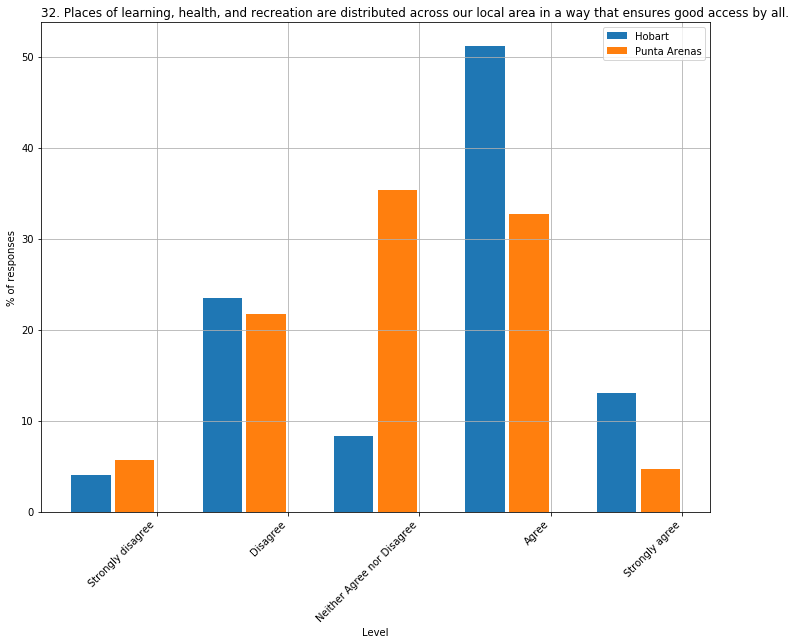

,Hobart,Punta Arenas
Strongly disagree,4,5.7
Disagree,23.5,21.7
Neither Agree nor Disagree,8.3,35.3
Agree,51.2,32.7
Strongly agree,13,4.7


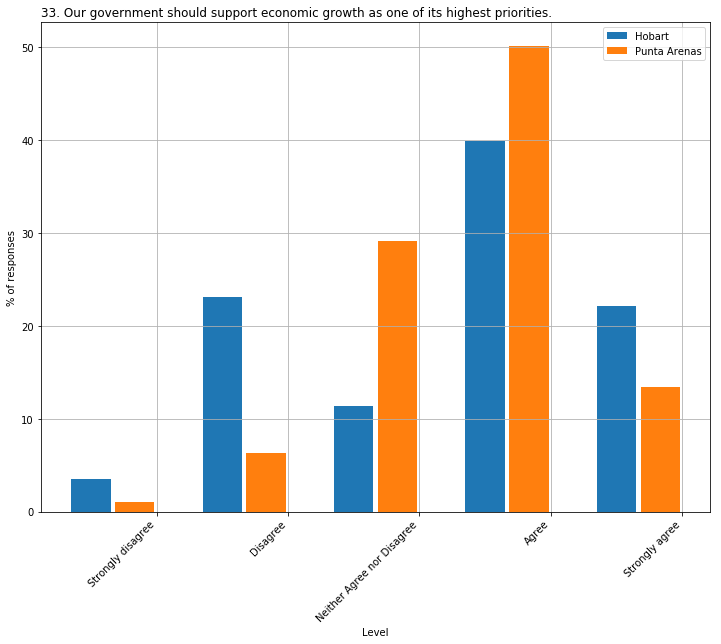

,Hobart,Punta Arenas
Strongly disagree,3.5,1
Disagree,23.1,6.4
Neither Agree nor Disagree,11.3,29.1
Agree,39.9,50.2
Strongly agree,22.2,13.4


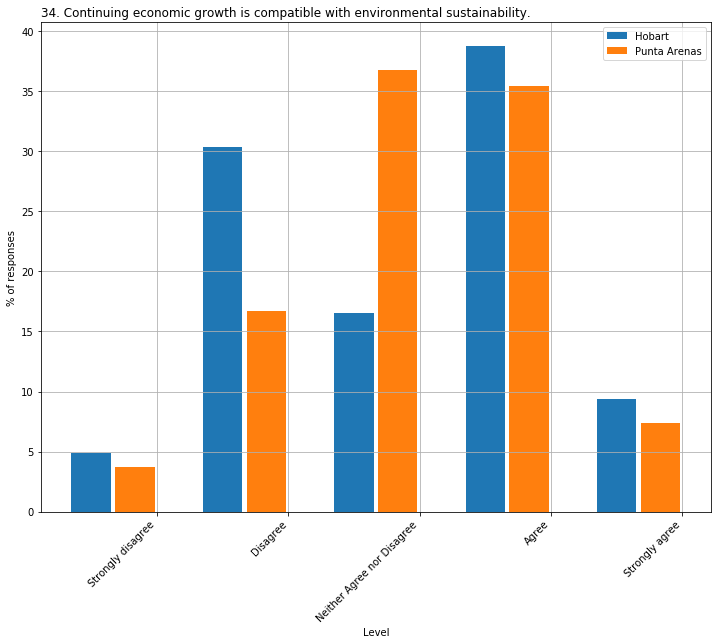

,Hobart,Punta Arenas
Strongly disagree,4.9,3.7
Disagree,30.4,16.7
Neither Agree nor Disagree,16.5,36.8
Agree,38.8,35.5
Strongly agree,9.4,7.4


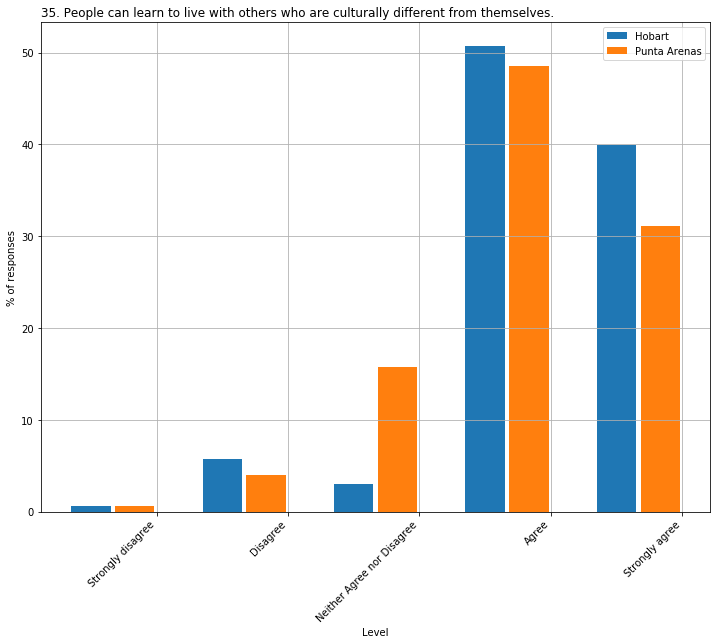

,Hobart,Punta Arenas
Strongly disagree,0.6,0.7
Disagree,5.7,4
Neither Agree nor Disagree,3,15.7
Agree,50.8,48.5
Strongly agree,39.9,31.1


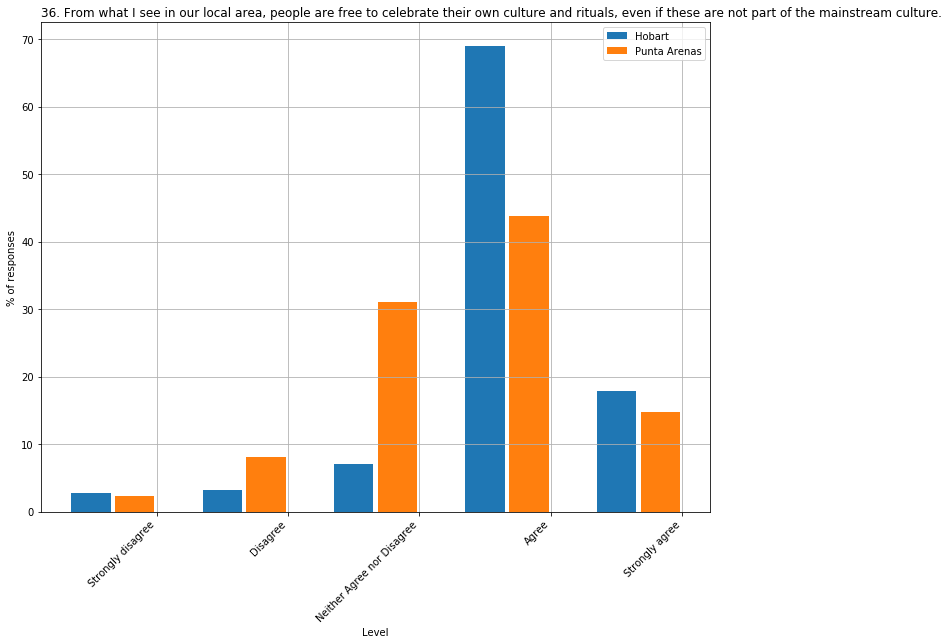

,Hobart,Punta Arenas
Strongly disagree,2.8,2.3
Disagree,3.2,8
Neither Agree nor Disagree,7,31.1
Agree,69,43.8
Strongly agree,17.9,14.7


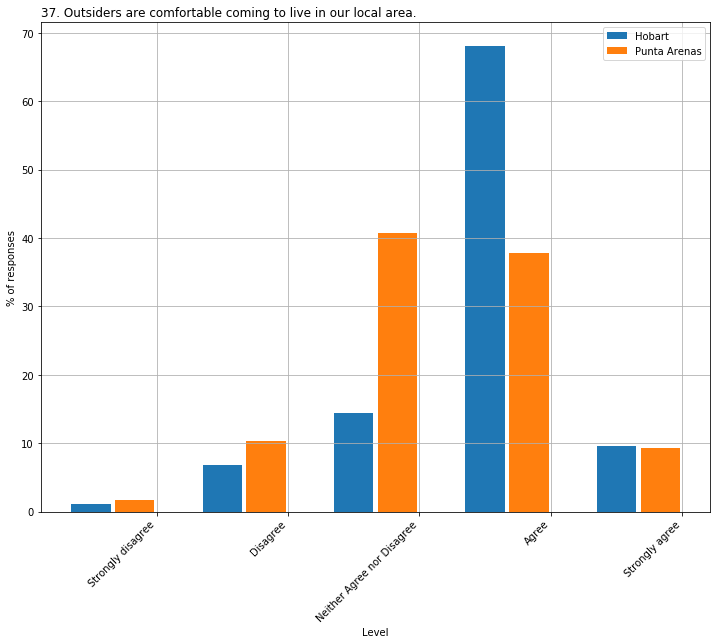

,Hobart,Punta Arenas
Strongly disagree,1.1,1.7
Disagree,6.8,10.4
Neither Agree nor Disagree,14.4,40.8
Agree,68.1,37.8
Strongly agree,9.6,9.4


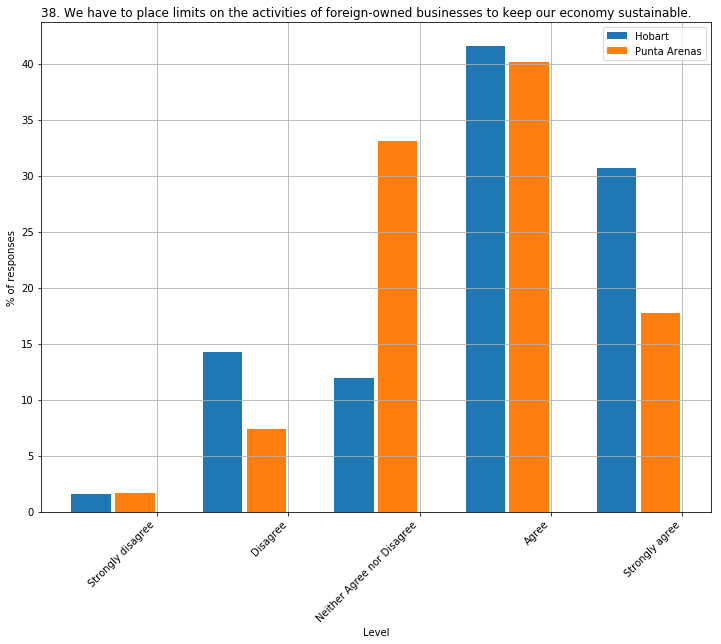

,Hobart,Punta Arenas
Strongly disagree,1.6,1.7
Disagree,14.2,7.4
Neither Agree nor Disagree,11.9,33.1
Agree,41.6,40.1
Strongly agree,30.7,17.7


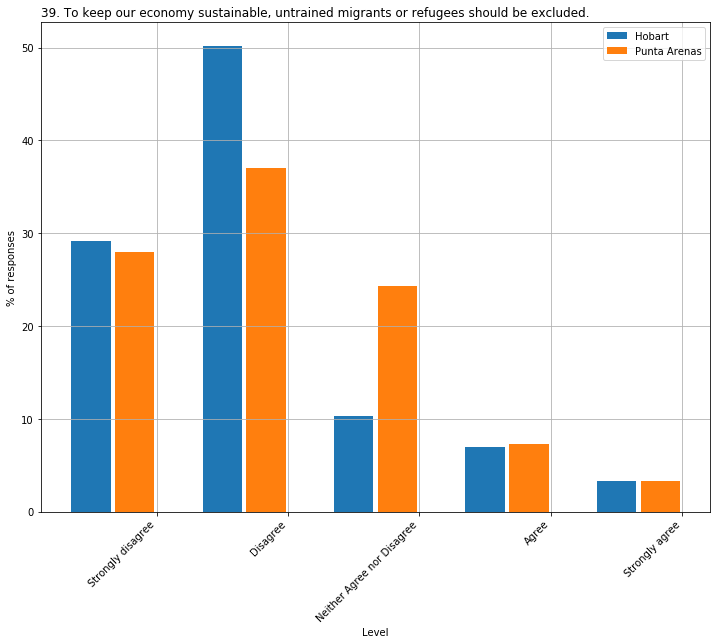

,Hobart,Punta Arenas
Strongly disagree,29.2,28
Disagree,50.2,37
Neither Agree nor Disagree,10.3,24.3
Agree,7,7.3
Strongly agree,3.3,3.3


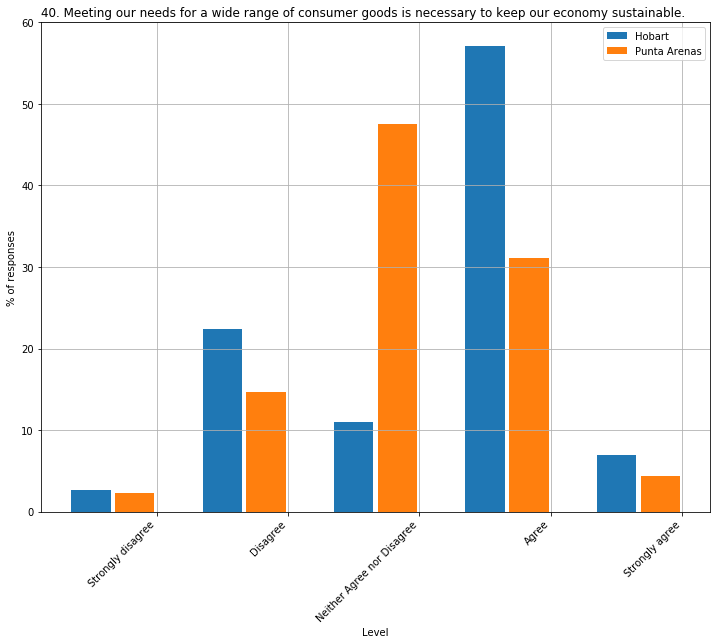

,Hobart,Punta Arenas
Strongly disagree,2.6,2.3
Disagree,22.4,14.7
Neither Agree nor Disagree,10.9,47.5
Agree,57.1,31.1
Strongly agree,7,4.3


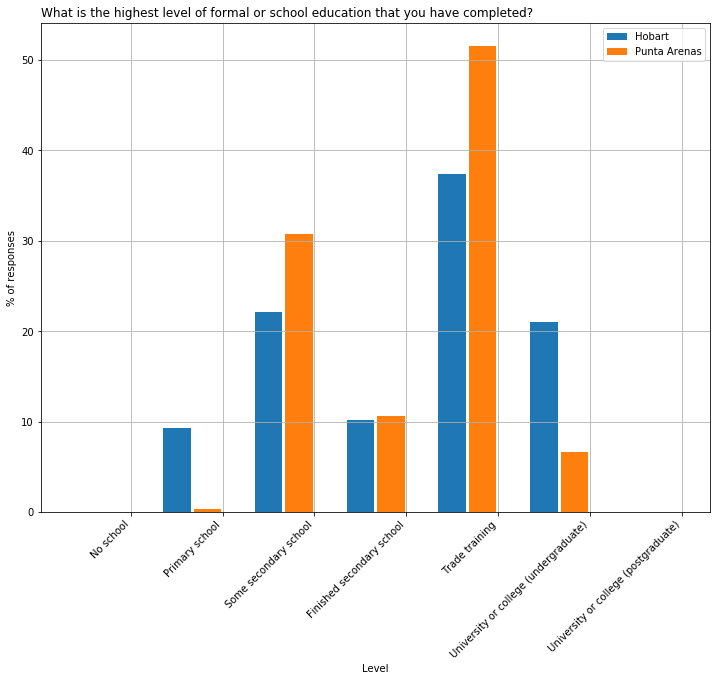

,Hobart,Punta Arenas
No school,0,0
Primary school,9.3,0.3
Some secondary school,22.1,30.8
Finished secondary school,10.2,10.7
Trade training,37.3,51.5
University or college (undergraduate),21,6.7
University or college (postgraduate),0,0


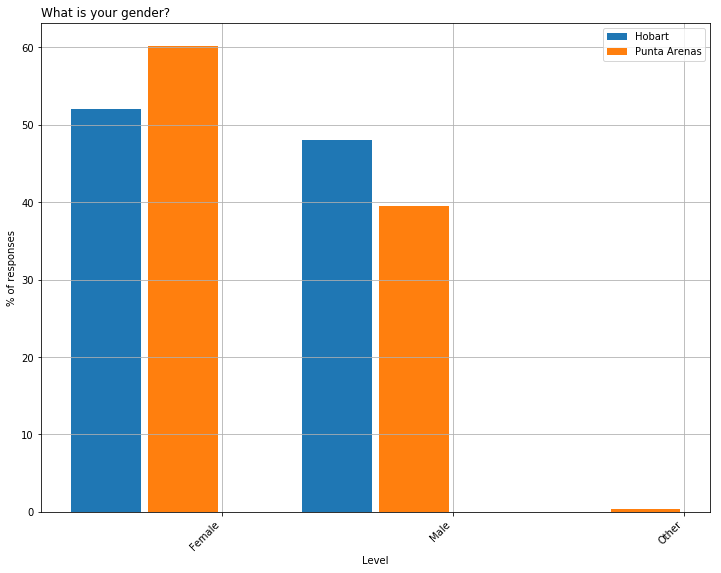

,Hobart,Punta Arenas
Female,52,60.2
Male,48,39.5
Other,0,0.3


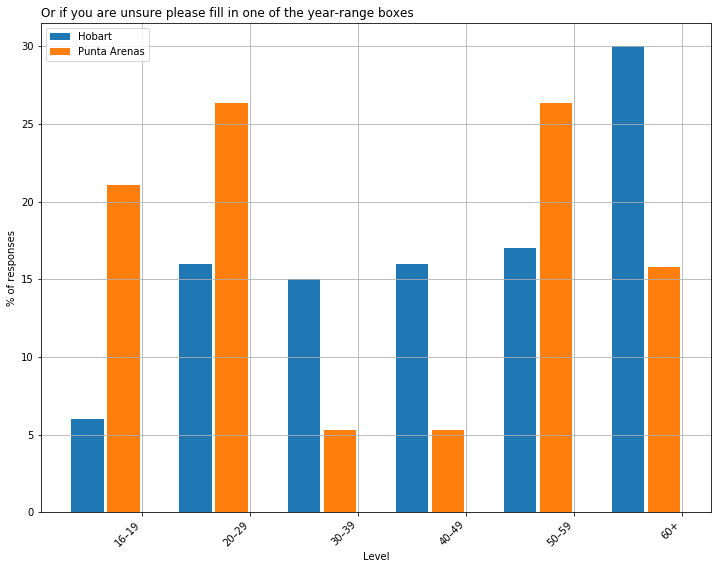

,Hobart,Punta Arenas
16–19,6,21.1
20–29,16,26.3
30–39,15,5.3
40–49,16,5.3
50–59,17,26.3
60+,30,15.8


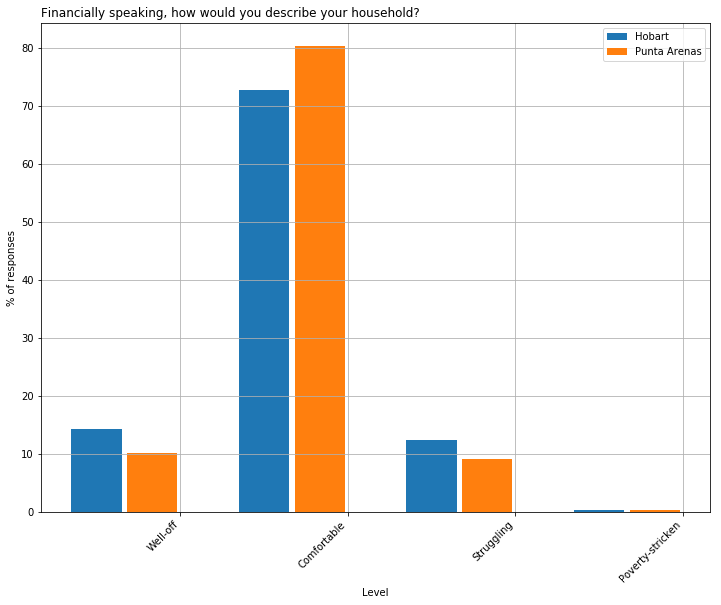

,Hobart,Punta Arenas
Well-off,14.3,10.2
Comfortable,72.9,80.3
Struggling,12.5,9.2
Poverty-stricken,0.4,0.3


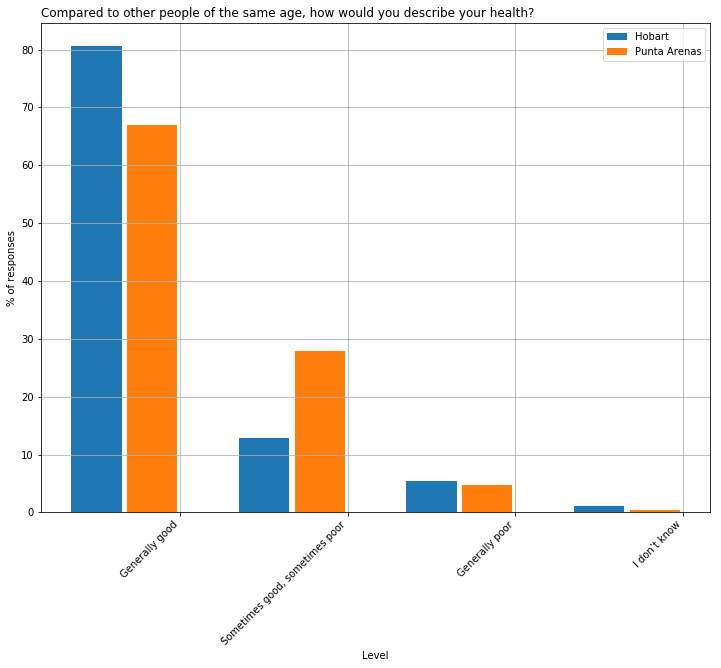

,Hobart,Punta Arenas
Generally good,80.5,67
"Sometimes good, sometimes poor",12.9,27.9
Generally poor,5.4,4.8
I don’t know,1.1,0.3


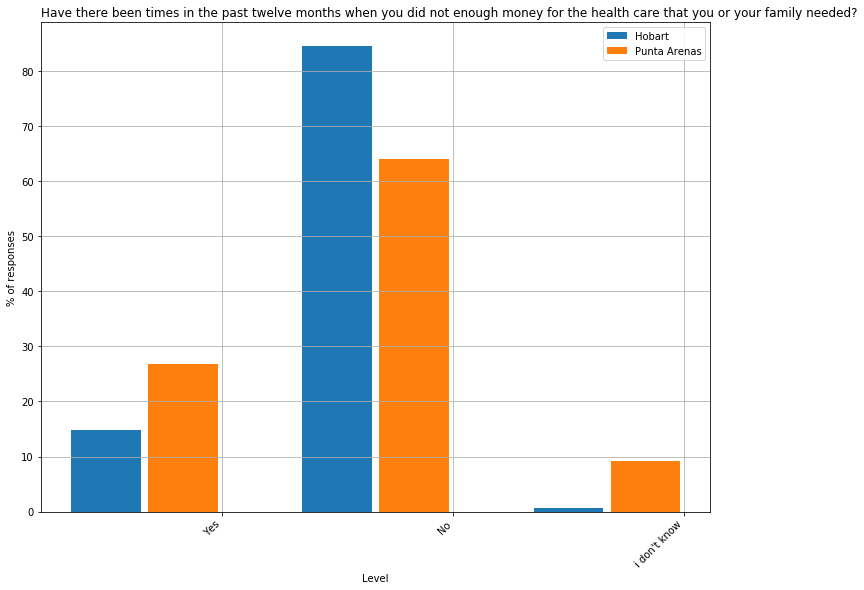

,Hobart,Punta Arenas
Yes,14.7,26.8
No,84.6,64.1
i don't know,0.7,9.2


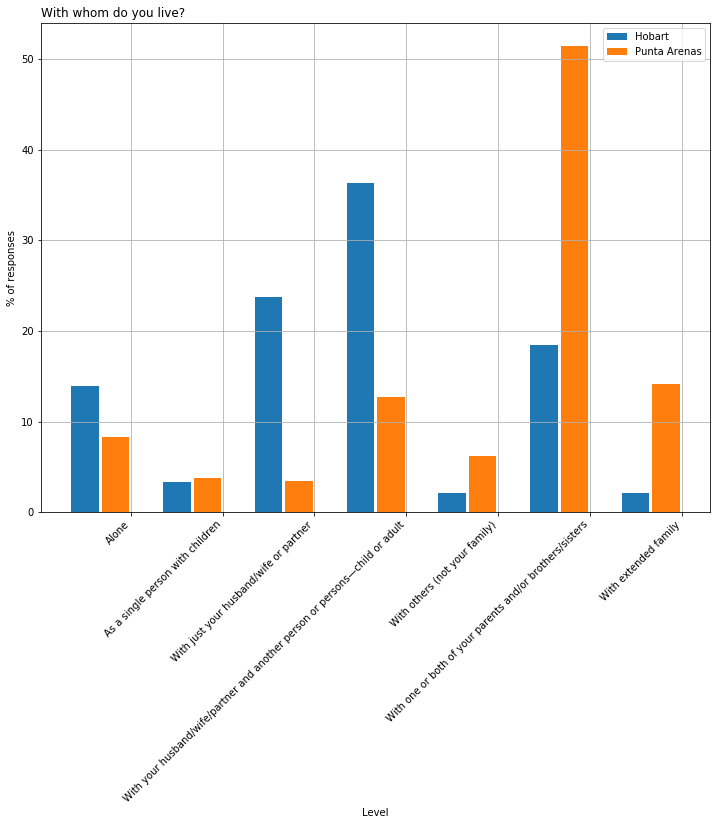

,Hobart,Punta Arenas
Alone,13.9,8.3
As a single person with children,3.4,3.8
With just your husband/wife or partner,23.7,3.4
With your husband/wife/partner and another person or persons—child or adult,36.3,12.8
With others (not your family),2.2,6.2
With one or both of your parents and/or brothers/sisters,18.5,51.4
With extended family,2.1,14.1


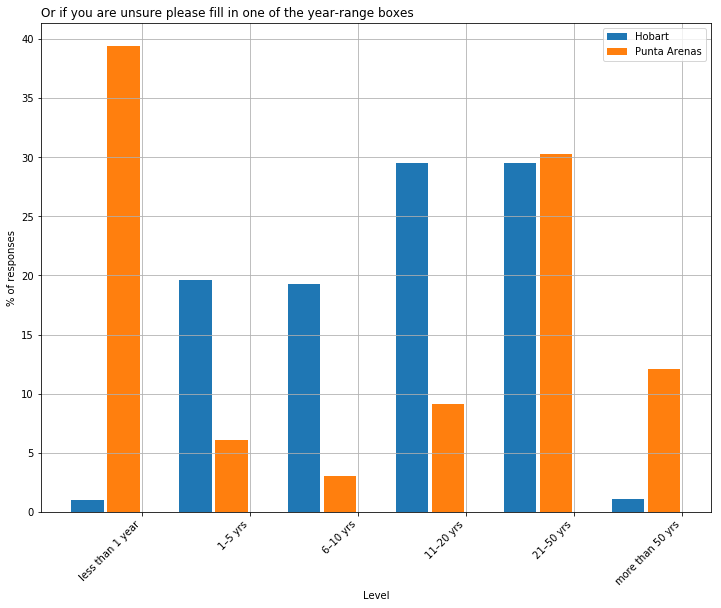

,Hobart,Punta Arenas
less than 1 year,1,39.4
1–5 yrs,19.7,6.1
6–10 yrs,19.3,3
11–20 yrs,29.5,9.1
21–50 yrs,29.5,30.3
more than 50 yrs,1.1,12.1


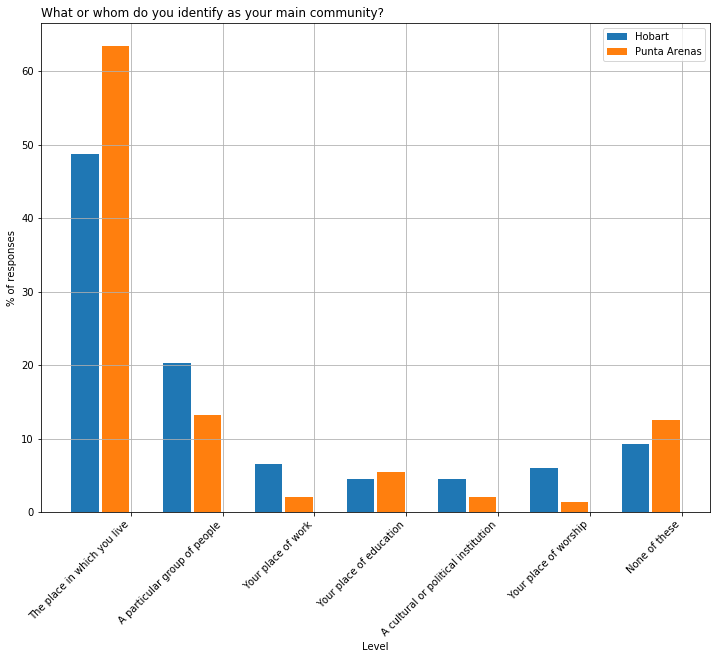

,Hobart,Punta Arenas
The place in which you live,48.7,63.4
A particular group of people,20.3,13.2
Your place of work,6.6,2
Your place of education,4.5,5.4
A cultural or political institution,4.5,2
Your place of worship,6,1.4
None of these,9.4,12.5


In [762]:
[ds.gen_histogram([x, 'Weight'], stacked = False, legend_labels = ['Hobart', 'Punta Arenas'], normalise=True, use_weights = True) for x in cols_to_render];